In [1]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from configs import engram_dir

# Parameters

In [2]:
internal_dim = 10
generic_exp_name = 'new_gridworld8x8'
network_yaml = 'dm'
episode = 350

In [3]:
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
latents_dir = f'{engram_dir}latents/{exp_name}/'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

In [4]:
n_iterations = 10
pos_model = f'{generic_exp_name}_g0_-2_entro1'
mf_model = f'{generic_exp_name}_mf1'
neg_model = f'{generic_exp_name}_entro0'

# Load transition model activity

In [6]:
with open(f'{analysis_dir}transition_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)

# Helper function

In [20]:
def get_spatial_info_scores(firing_fields):
    ''' FIRING_FIELDS should be (units, height, width) '''
    
    scores = []
    n_states = (firing_fields.shape[1]-1)*(firing_fields.shape[2]-1)
    occupancy_p = 1/n_states
    for ff in firing_fields:
        ff = ff[1:-1, 1:-1].flatten()
        ff[ff<0] = 0
        mean_f = np.mean(ff)
        f_ratio = ff/mean_f
        score = occupancy_p * f_ratio * np.log2(f_ratio+1E-5)
        score = np.sum(score)
        scores.append(score)
    return scores

In [76]:
def save_T_receptive_fields(dirname, model):
    os.makedirs(dirname, exist_ok=True)
    for _iter in range(n_iterations):
        print(f'======= ITERATION {_iter} =========')
        _df = repr_df[repr_df['model'] == model]
        _df = _df[_df['iteration'] == _iter]
        width = np.max(_df['x']) + 2
        height = np.max(_df['y']) + 2
        _sample = np.array(_df.head(1)['outputs'].item())
        n_actions = 4
        n_units = _sample.size
        heatmap = np.zeros((n_actions, n_units, width, height))

        for _, row in _df.iterrows():
            x = row['x']
            y = row['y']
            latents = np.array(row['outputs'])
            action = row['action']
            heatmap[action,:,x,y] = latents
        goal_state = row['goal_state']
        heatmap = np.mean(heatmap, axis=0)
        scores = get_spatial_info_scores(heatmap)
        sorted_units = np.argsort(scores)[::-1]

        for unit in sorted_units:
            plt.figure(figsize=(0.4,0.4), constrained_layout=True)
            m = heatmap[unit].copy()
            m[m<0] = 0
            plt.imshow(m)
            plt.xticks([]); plt.yticks([])
            ax = plt.gca()
            ax.spines['bottom'].set(visible=False)
            ax.spines['left'].set(visible=False)
            ax.spines['top'].set(visible=False)
            ax.spines['right'].set(visible=False)
            plt.text(goal_state[1], goal_state[0]+0.5, '*',
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white', fontsize=6)
            plt.savefig(f'{dirname}/{_iter}_{unit}.png', dpi=300, transparent=True)
            plt.show()

# CPC Receptive Fields

======= ITERATION 0 =========


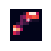

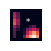

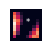

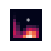

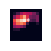

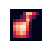

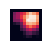

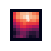

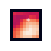

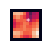

======= ITERATION 1 =========


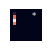

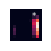

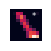

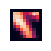

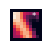

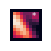

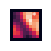

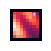

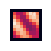

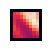

======= ITERATION 2 =========


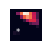

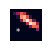

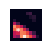

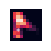

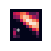

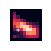

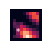

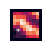

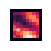

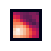

======= ITERATION 3 =========


/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_2156/1185937955.py:11: RuntimeWarning: invalid value encountered in divide
  f_ratio = ff/mean_f


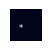

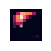

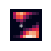

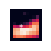

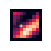

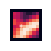

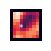

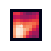

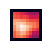

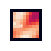

======= ITERATION 4 =========


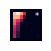

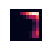

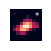

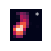

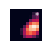

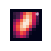

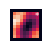

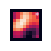

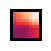

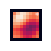

======= ITERATION 5 =========


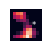

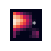

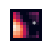

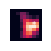

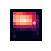

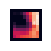

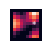

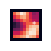

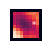

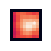

======= ITERATION 6 =========


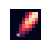

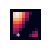

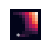

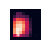

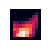

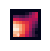

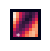

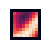

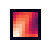

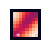

======= ITERATION 7 =========


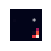

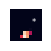

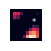

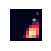

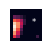

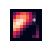

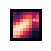

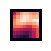

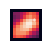

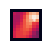

======= ITERATION 8 =========


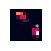

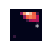

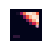

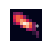

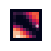

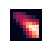

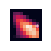

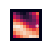

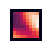

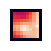

======= ITERATION 9 =========


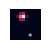

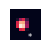

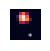

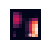

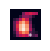

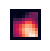

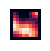

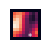

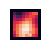

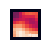

In [77]:
save_T_receptive_fields('3d_pos_fields', pos_model)

# MF Receptive Fields

======= ITERATION 0 =========


/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_2156/1185937955.py:11: RuntimeWarning: invalid value encountered in divide
  f_ratio = ff/mean_f


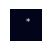

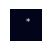

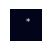

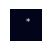

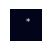

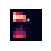

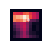

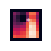

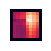

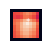

======= ITERATION 1 =========


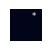

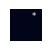

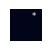

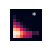

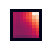

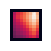

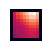

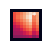

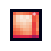

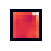

======= ITERATION 2 =========


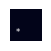

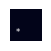

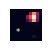

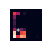

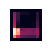

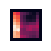

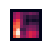

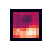

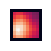

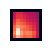

======= ITERATION 3 =========


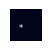

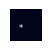

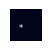

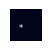

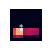

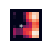

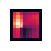

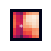

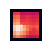

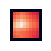

======= ITERATION 4 =========


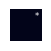

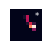

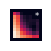

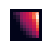

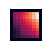

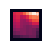

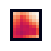

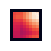

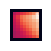

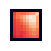

======= ITERATION 5 =========


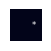

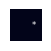

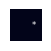

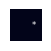

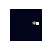

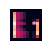

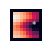

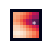

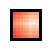

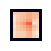

======= ITERATION 6 =========


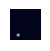

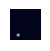

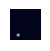

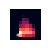

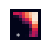

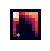

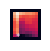

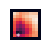

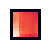

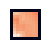

======= ITERATION 7 =========


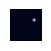

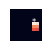

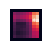

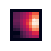

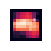

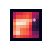

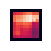

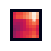

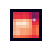

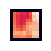

======= ITERATION 8 =========


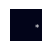

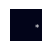

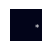

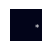

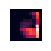

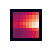

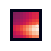

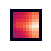

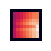

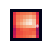

======= ITERATION 9 =========


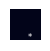

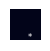

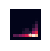

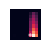

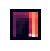

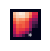

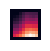

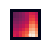

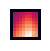

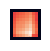

In [78]:
save_T_receptive_fields('3d_mf_fields', mf_model)

# Neg Receptive Fields

======= ITERATION 0 =========


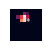

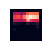

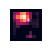

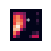

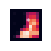

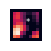

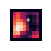

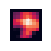

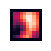

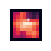

======= ITERATION 1 =========


/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_2156/1185937955.py:11: RuntimeWarning: invalid value encountered in divide
  f_ratio = ff/mean_f


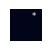

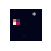

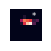

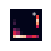

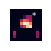

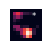

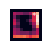

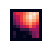

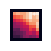

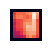

======= ITERATION 2 =========


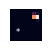

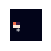

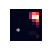

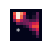

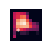

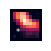

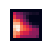

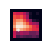

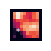

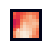

======= ITERATION 3 =========


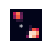

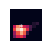

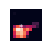

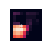

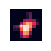

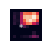

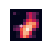

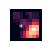

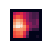

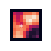

======= ITERATION 4 =========


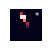

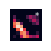

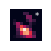

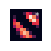

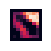

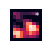

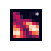

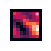

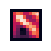

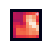

======= ITERATION 5 =========


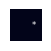

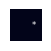

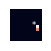

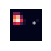

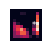

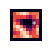

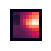

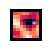

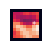

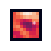

======= ITERATION 6 =========


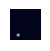

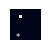

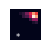

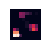

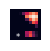

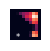

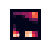

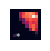

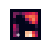

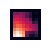

======= ITERATION 7 =========


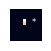

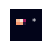

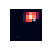

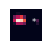

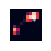

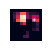

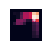

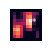

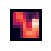

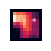

======= ITERATION 8 =========


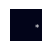

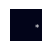

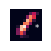

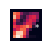

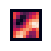

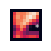

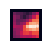

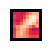

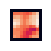

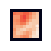

======= ITERATION 9 =========


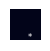

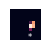

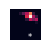

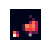

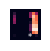

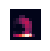

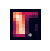

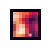

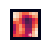

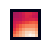

In [79]:
save_T_receptive_fields('3d_neg_fields', neg_model)

# Encoder receptive fields

In [ ]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)

In [ ]:
for _iter in range(5):
    print(f'======= ITERATION {_iter} =========')
    _df = repr_df[repr_df['model'] == model]
    _df = _df[_df['iteration'] == _iter]
    width = np.max(_df['x']) + 2
    height = np.max(_df['y']) + 2

    _sample = np.array(_df.head(1)['latents'].item())
    n_units = _sample.size
    heatmap = np.zeros((n_units, width, height))

    for _, row in _df.iterrows():
        x = row['x']
        y = row['y']
        latents = np.array(row['latents'])
        heatmap[:,x,y] = latents
    goal_state = row['goal_state']

    for unit in range(n_units):
        plt.figure()
        m = heatmap[unit]
        m[m<0] = 0
        plt.imshow(heatmap[unit])
        plt.colorbar()
        plt.text(0., 1, 'x=1\ny=0',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='white', fontsize=8)
        plt.text(1, 0, 'x=0\ny=1',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='white', fontsize=8)
        ax = plt.gca()
        ax.spines['top'].set(visible=True)
        ax.spines['right'].set(visible=True)
        plt.text(goal_state[1], goal_state[0], '*',
                horizontalalignment='center',
                verticalalignment='center',
                color='white', fontsize=14)
        plt.title(unit)
        plt.show()

# Convolutional layer receptive fields

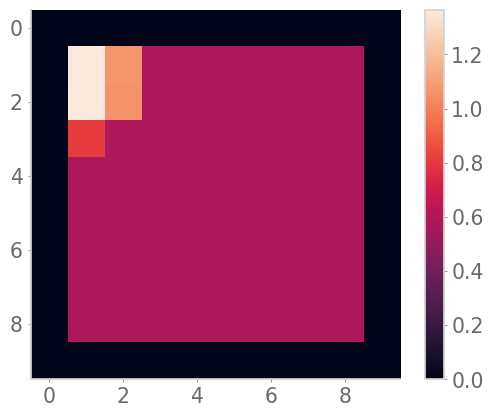

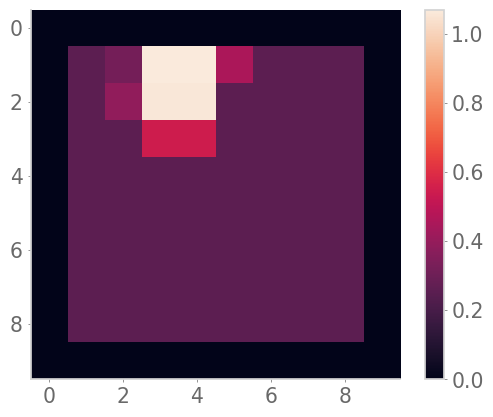

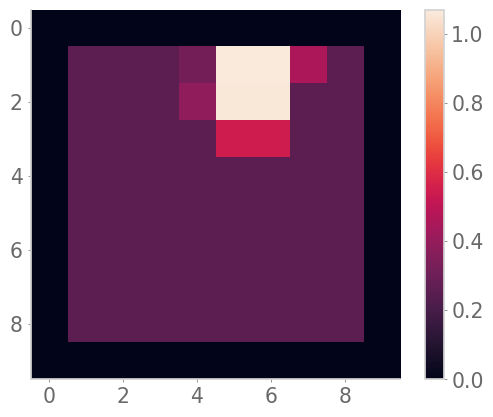

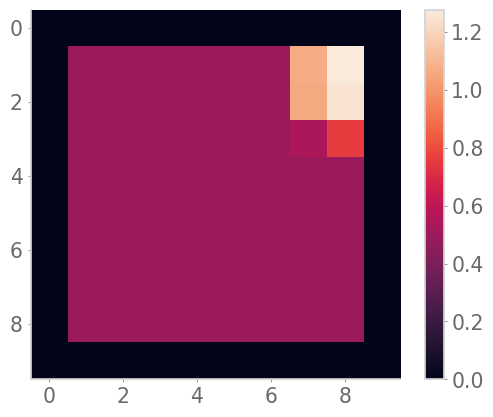

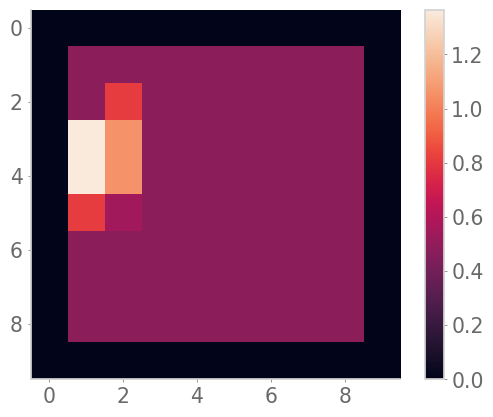

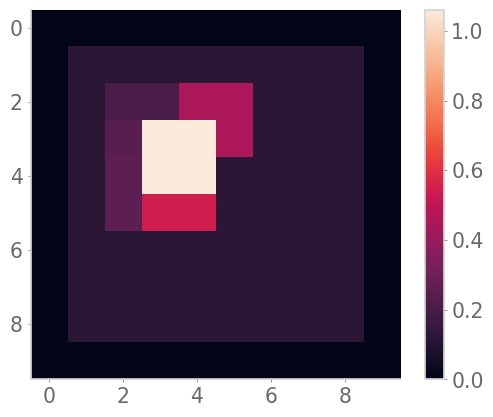

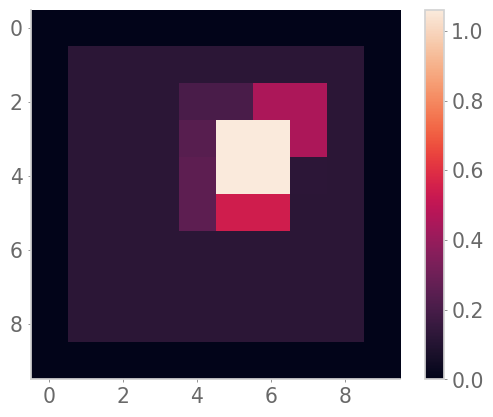

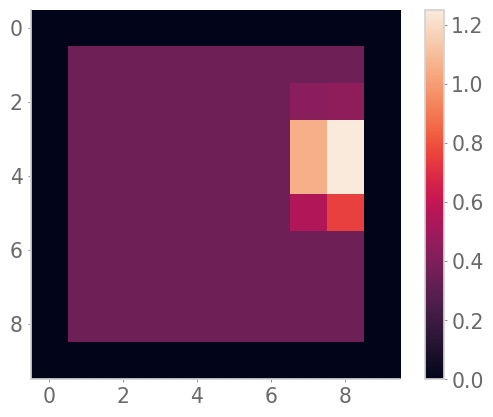

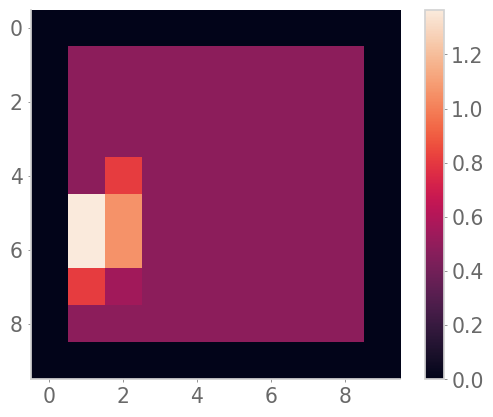

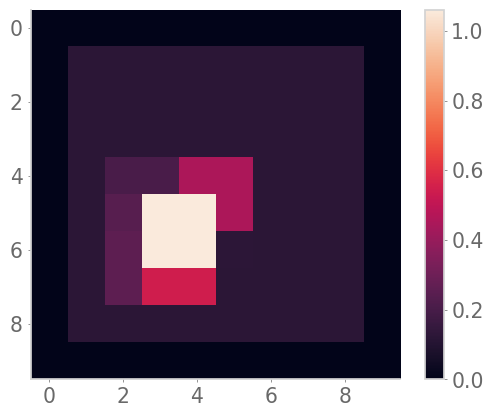

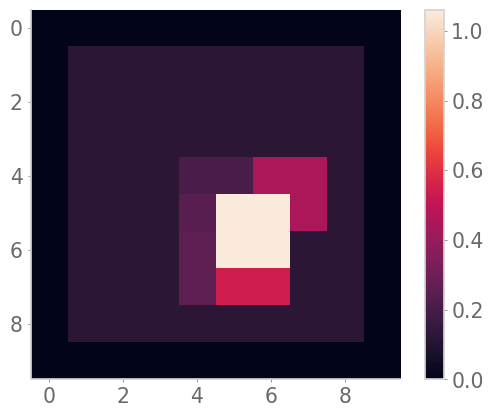

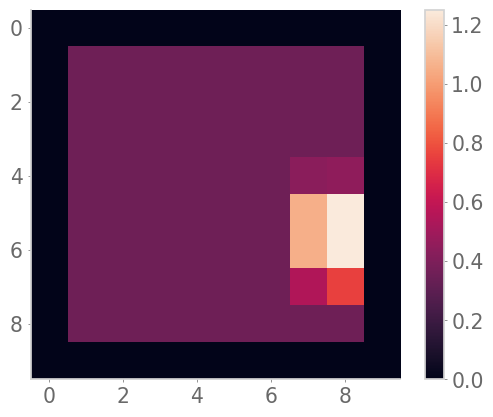

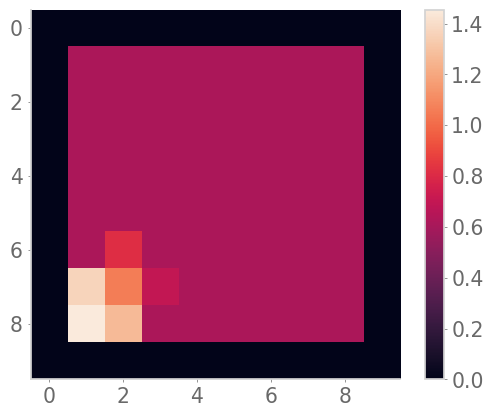

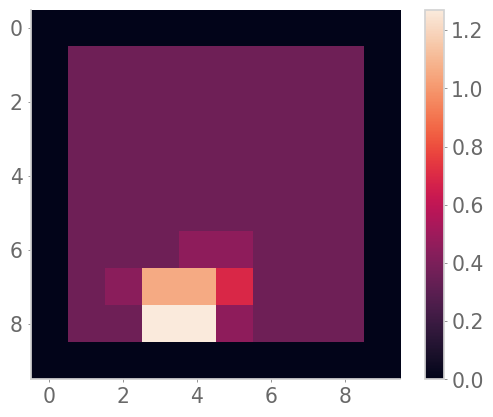

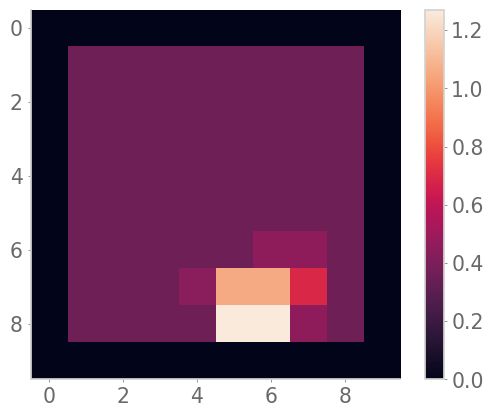

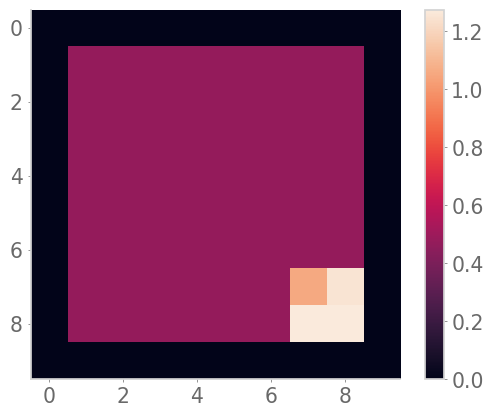

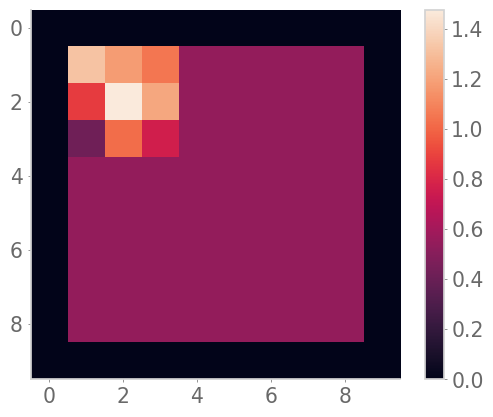

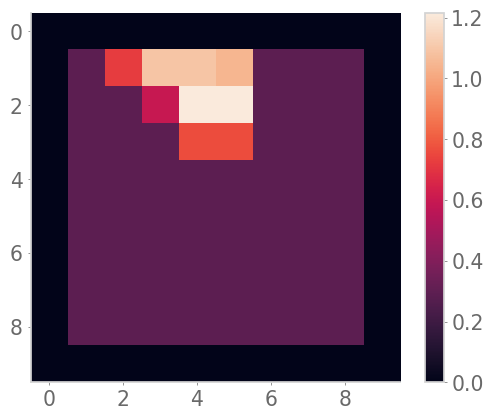

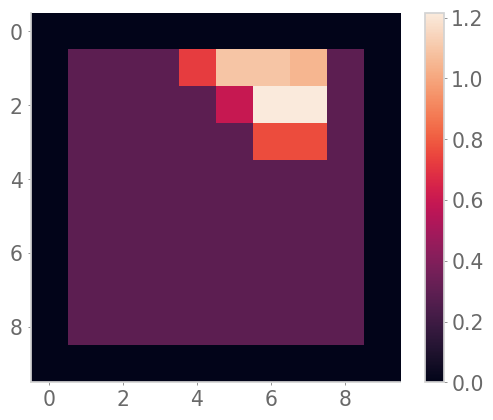

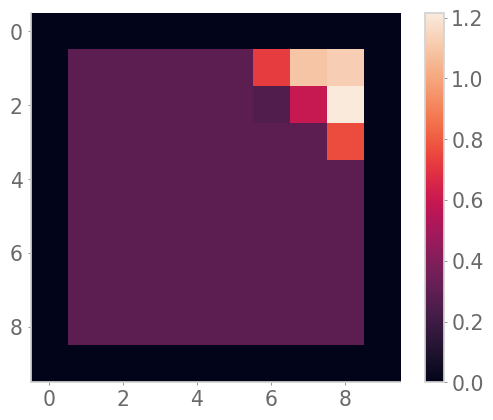

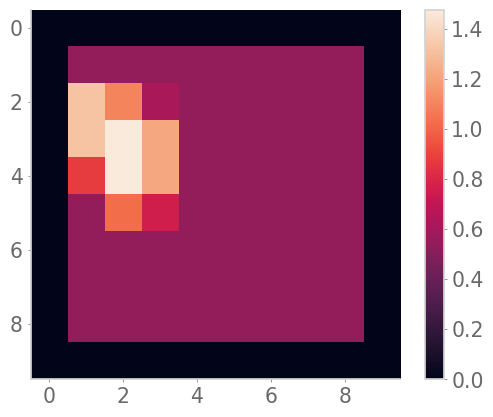

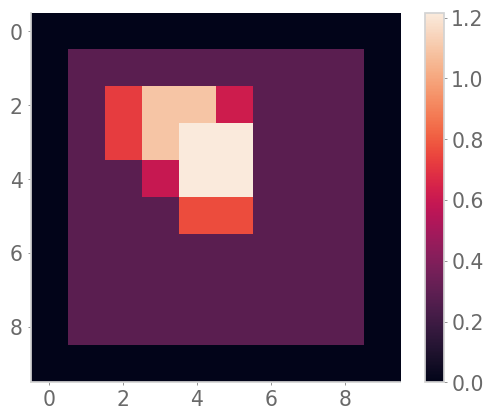

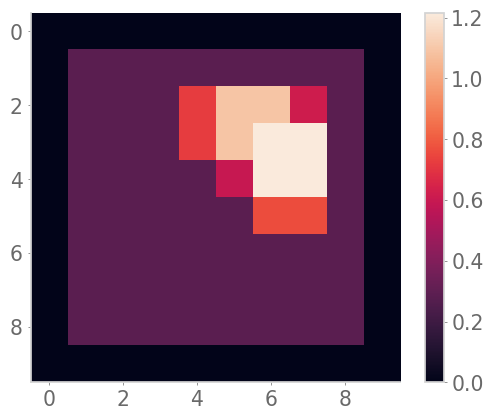

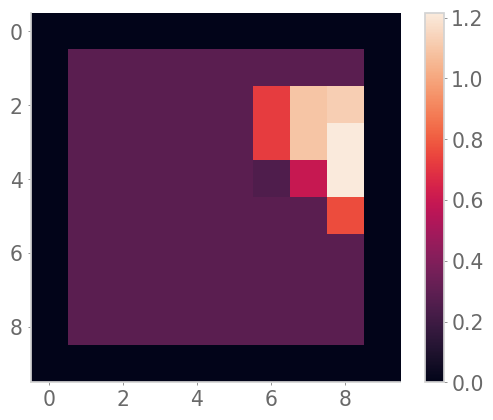

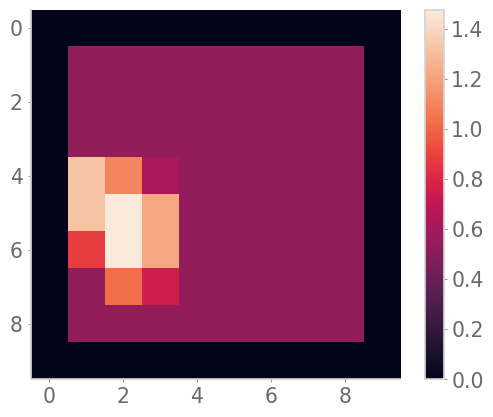

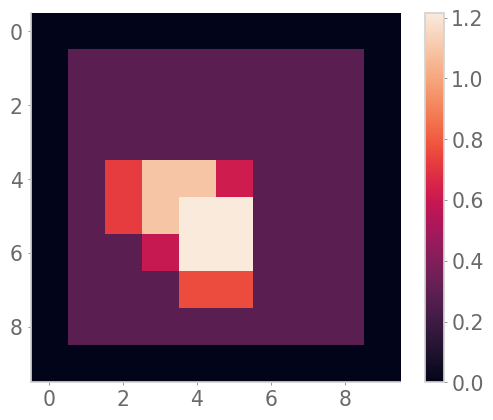

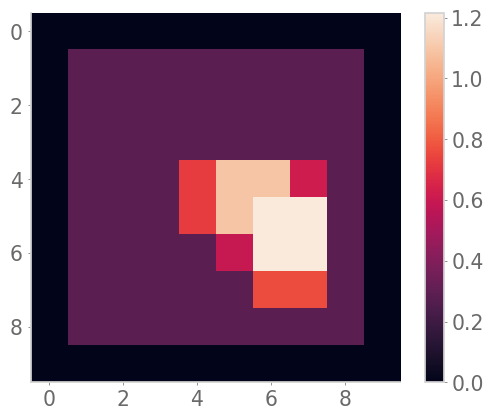

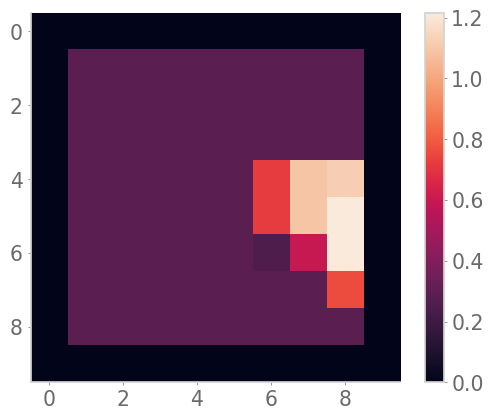

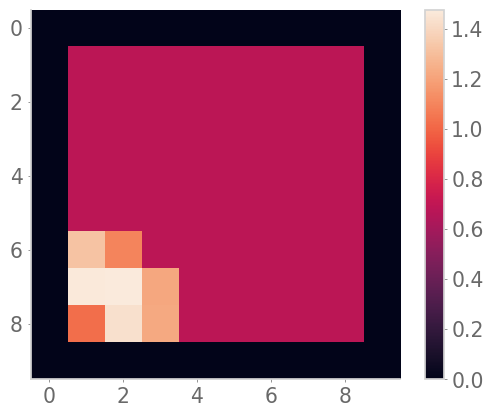

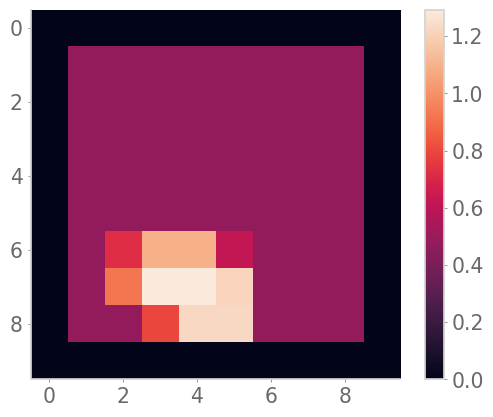

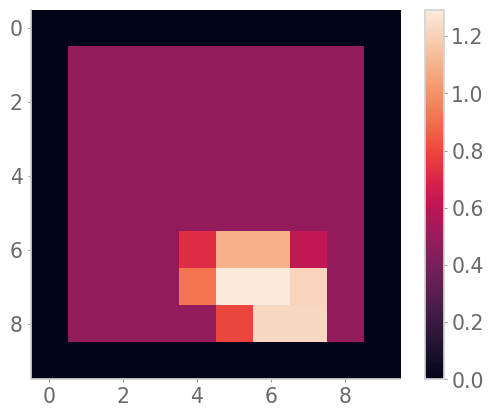

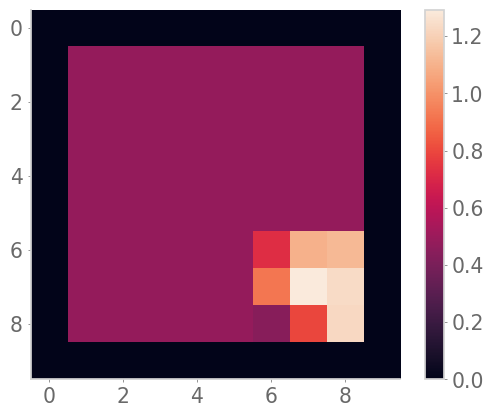

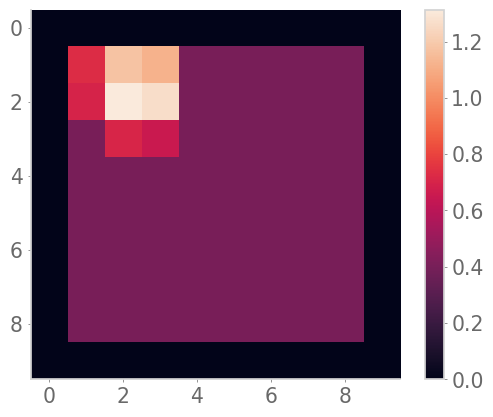

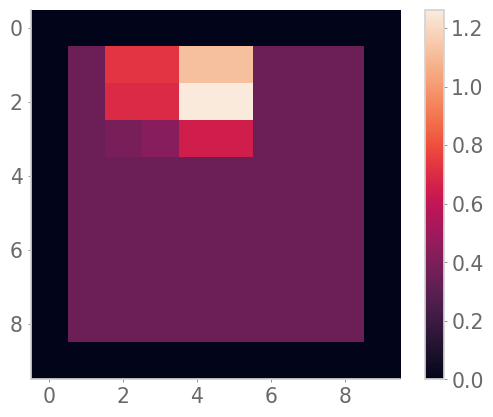

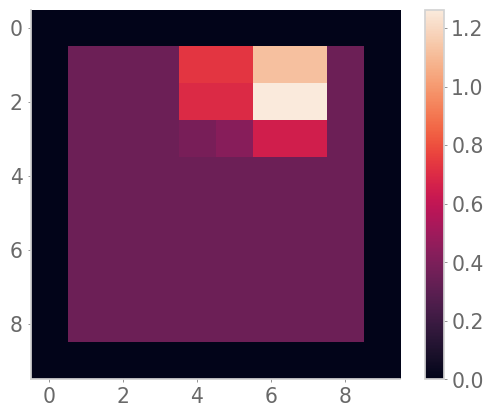

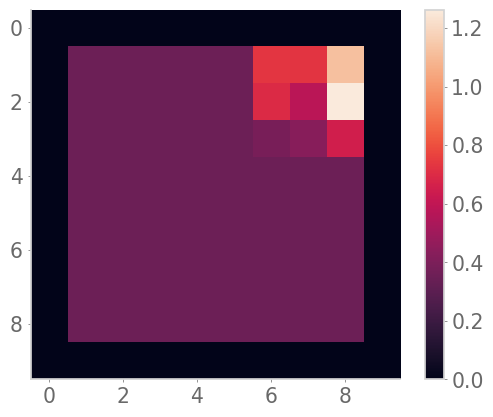

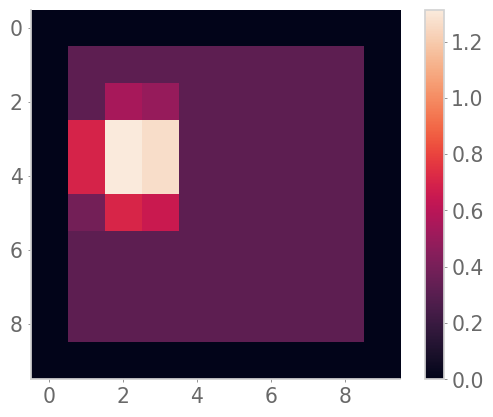

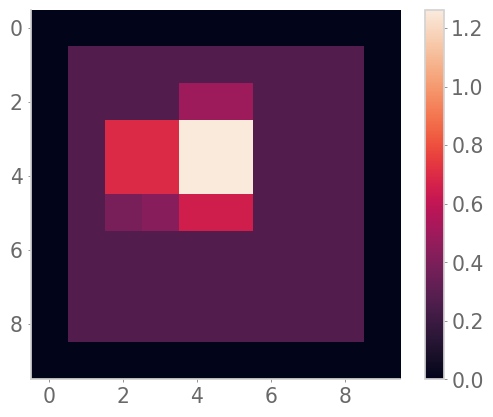

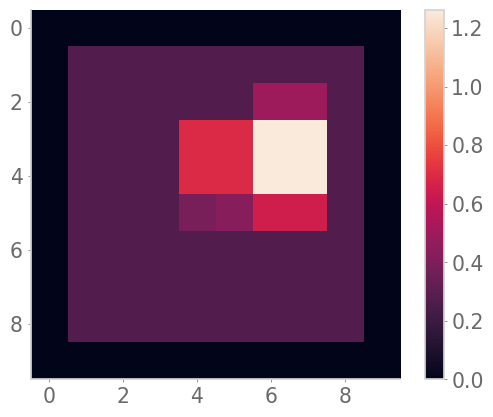

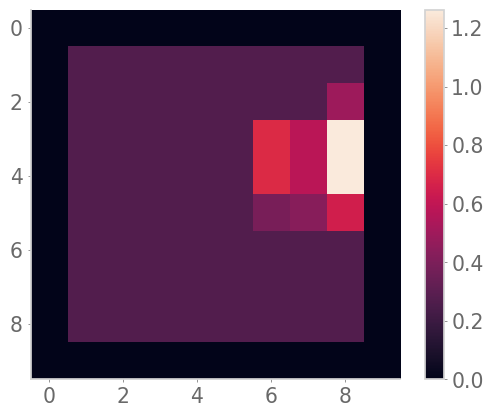

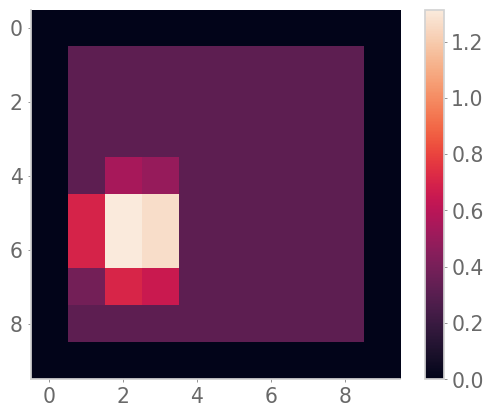

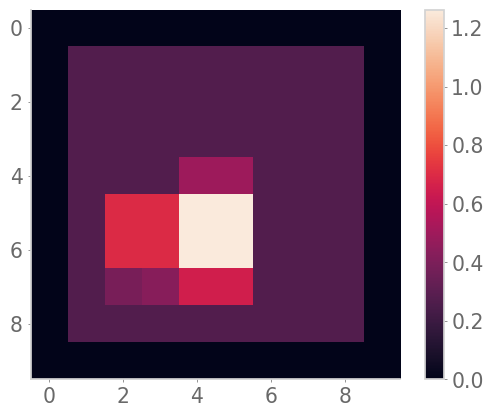

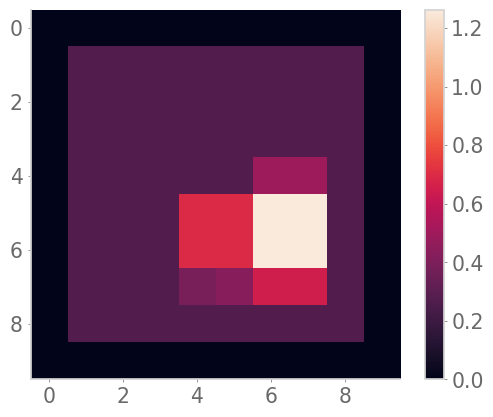

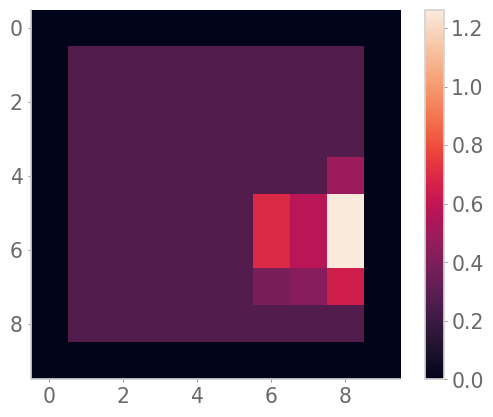

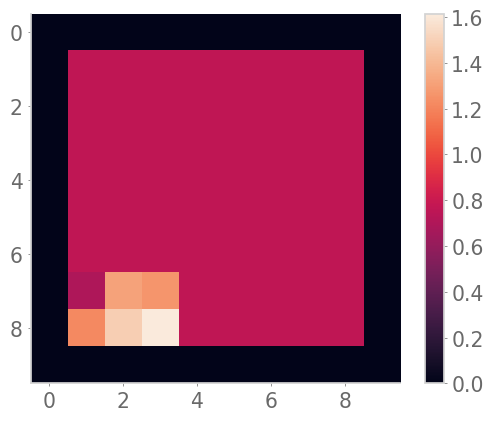

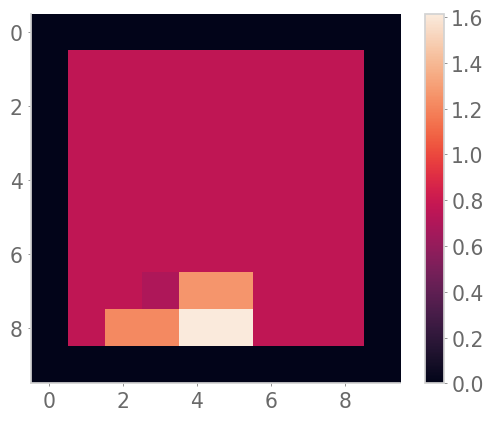

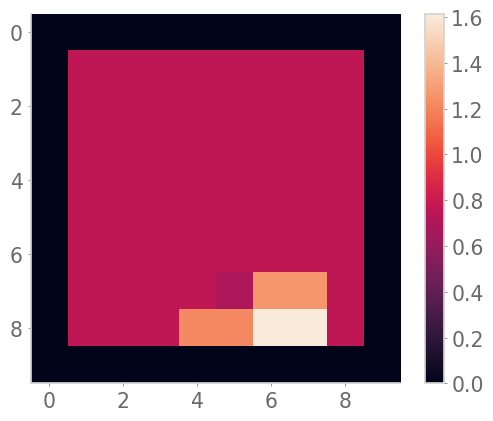

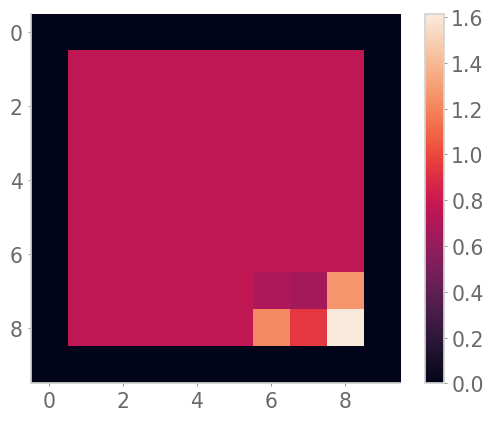

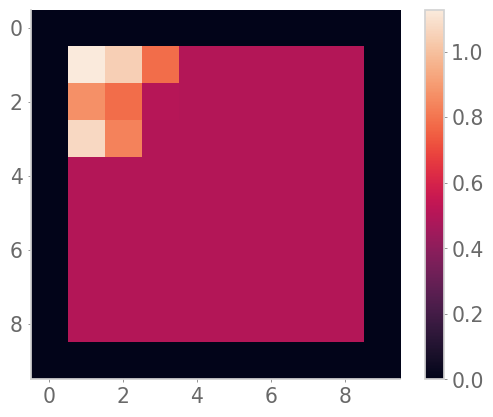

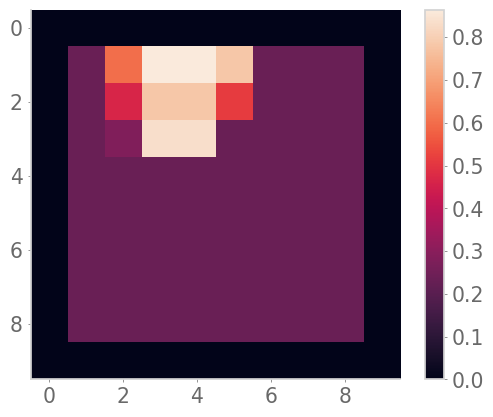

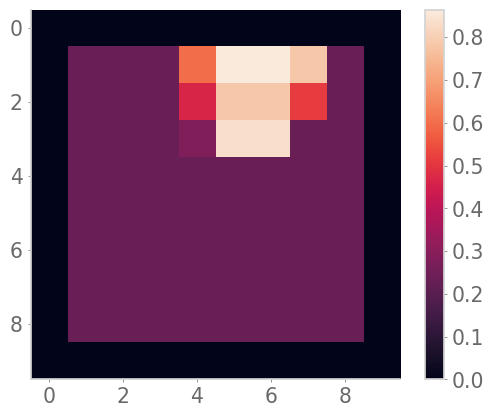

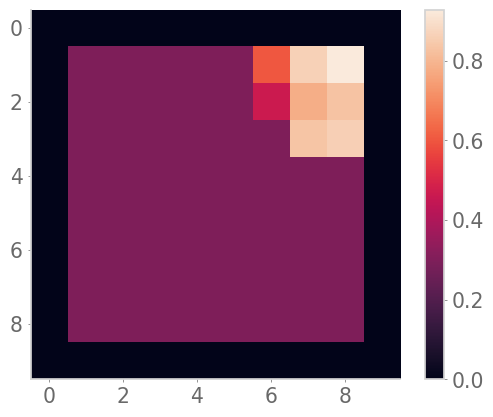

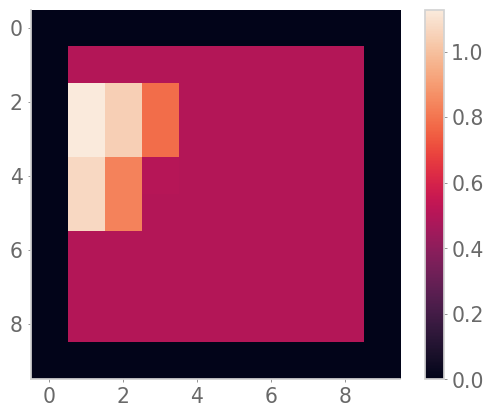

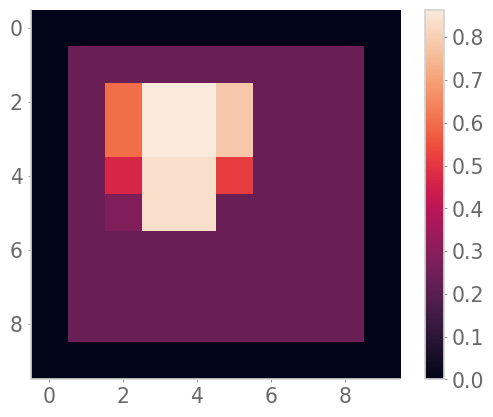

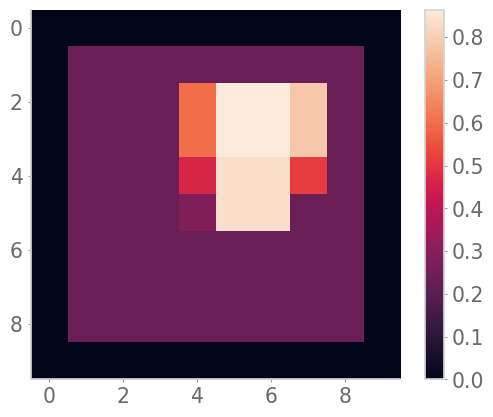

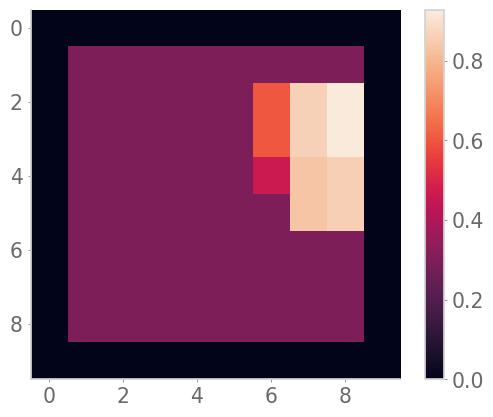

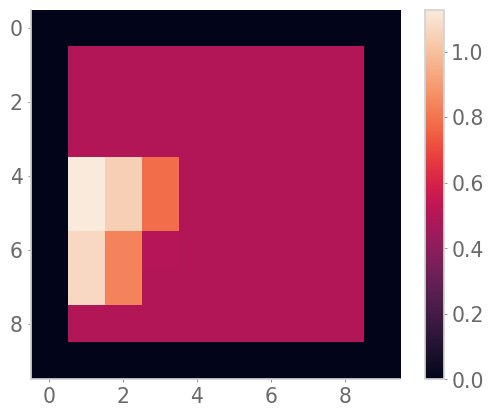

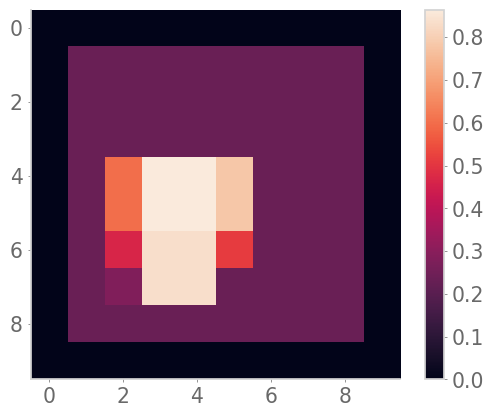

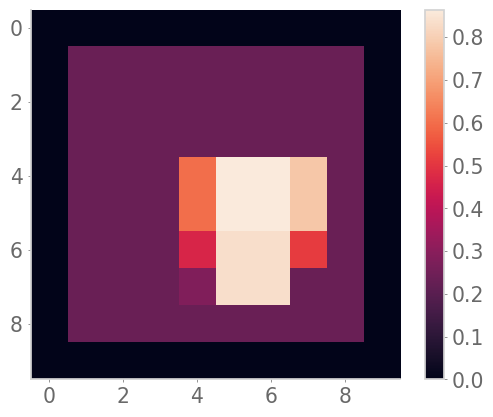

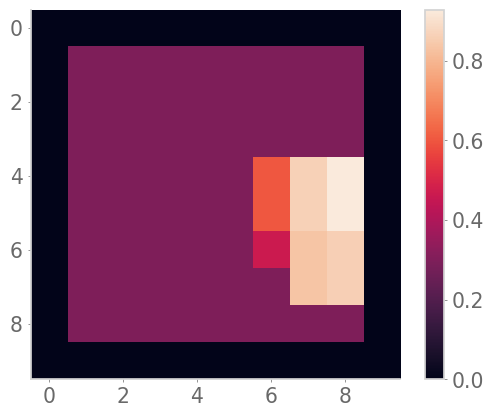

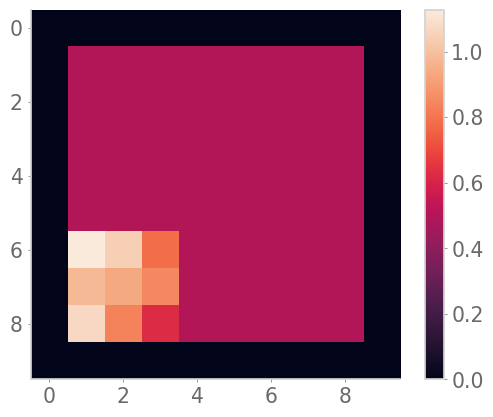

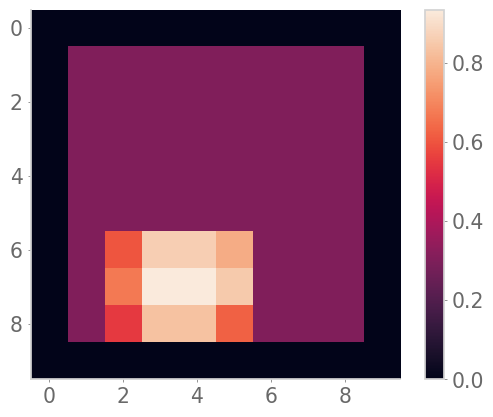

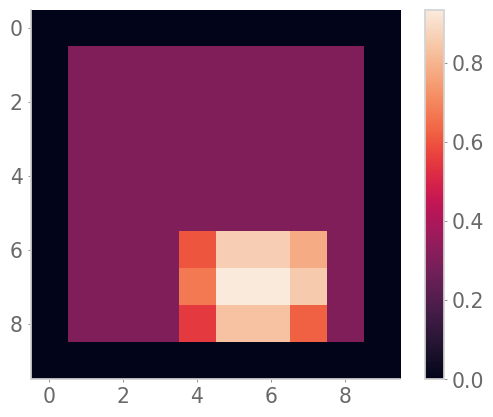

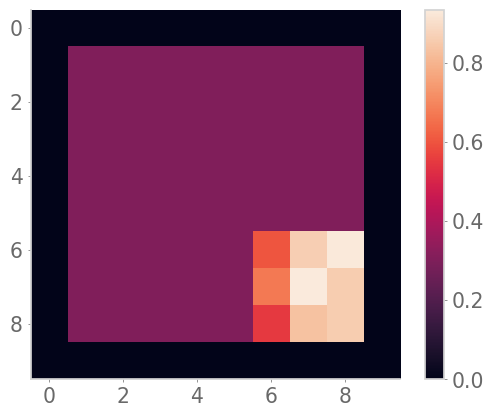

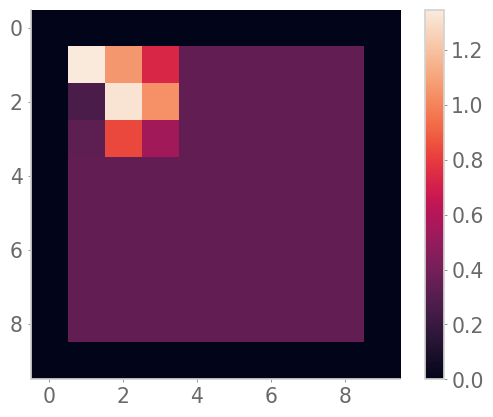

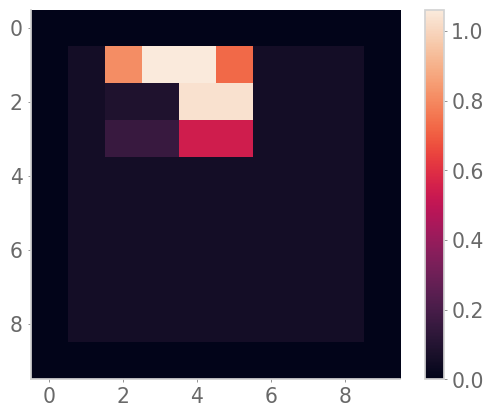

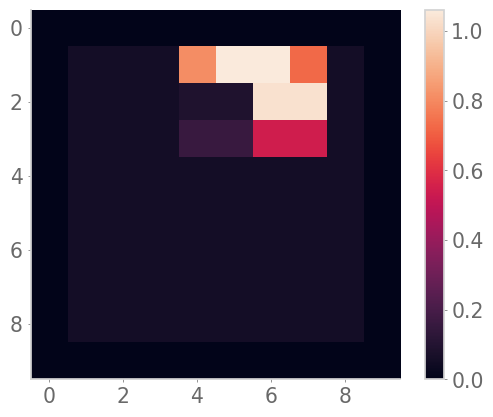

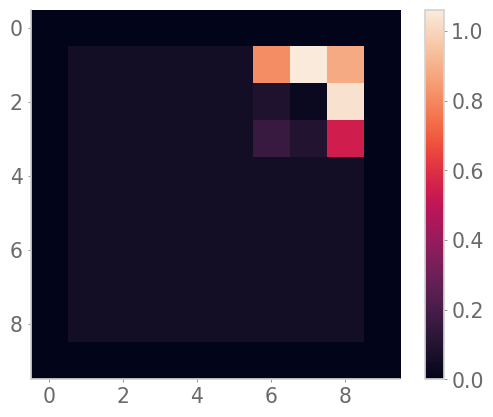

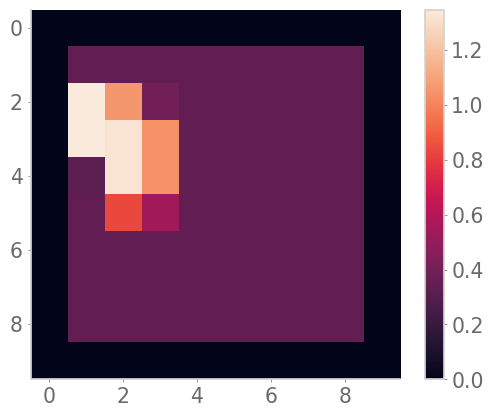

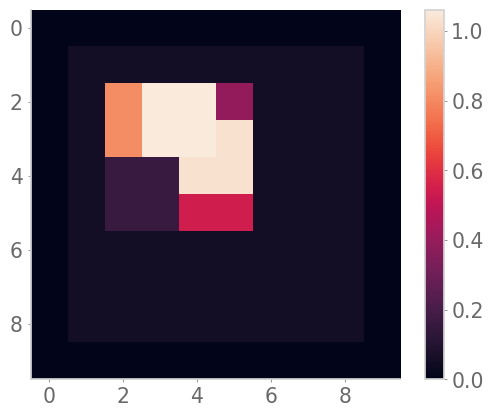

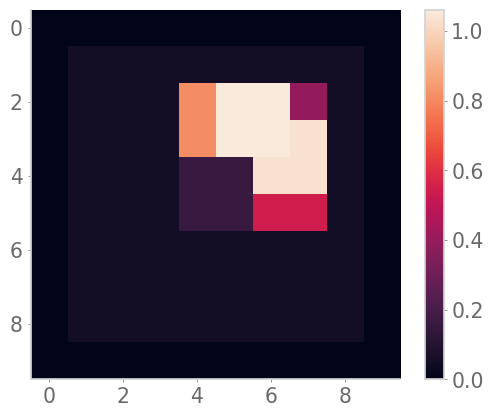

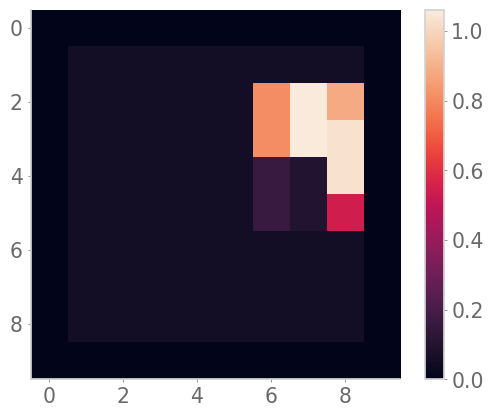

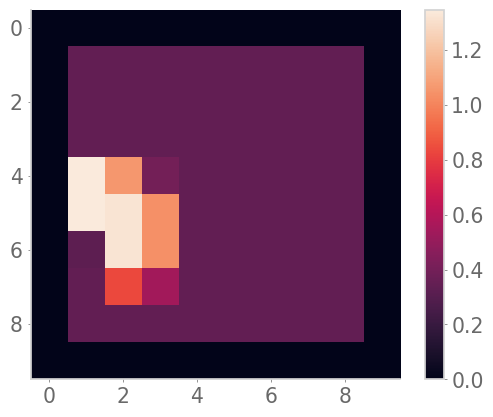

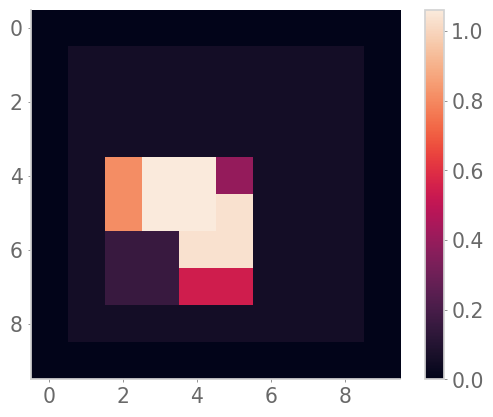

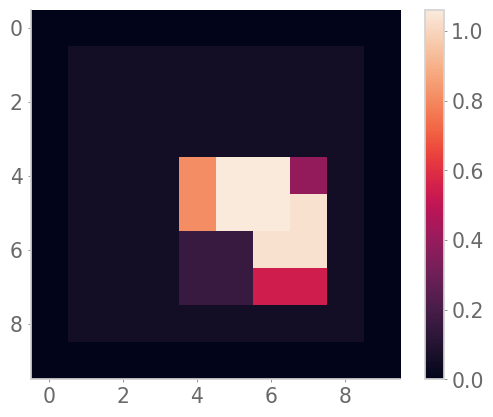

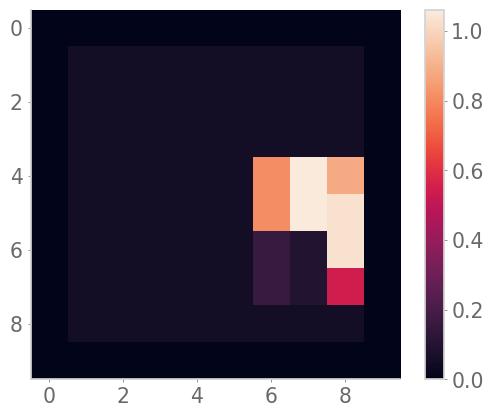

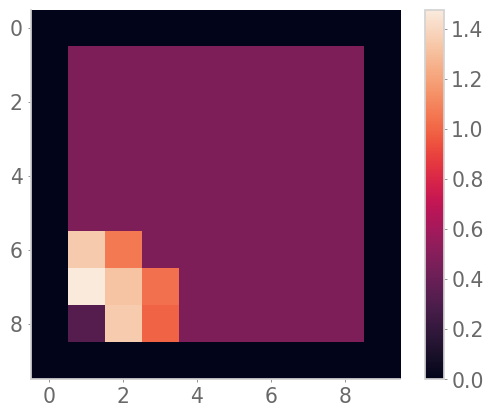

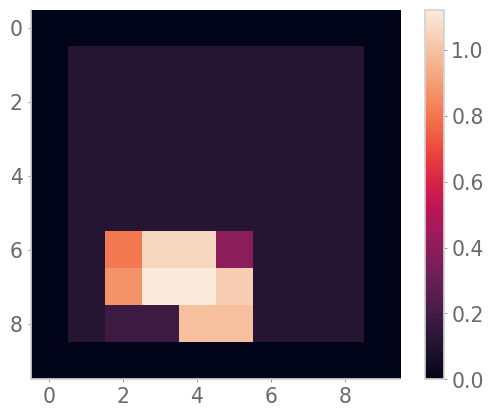

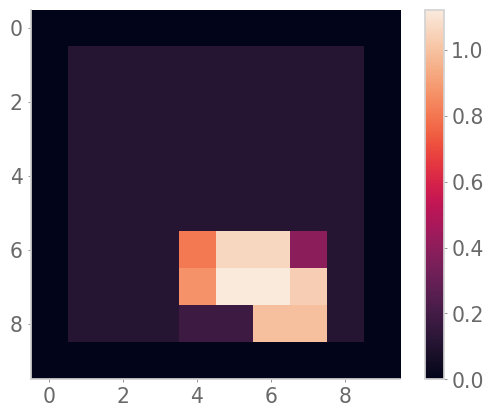

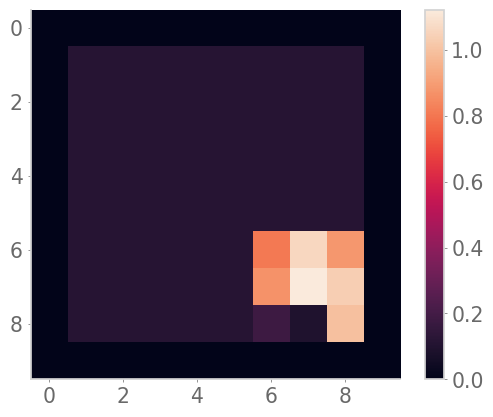

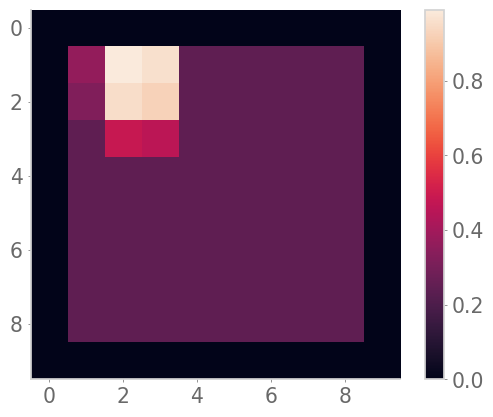

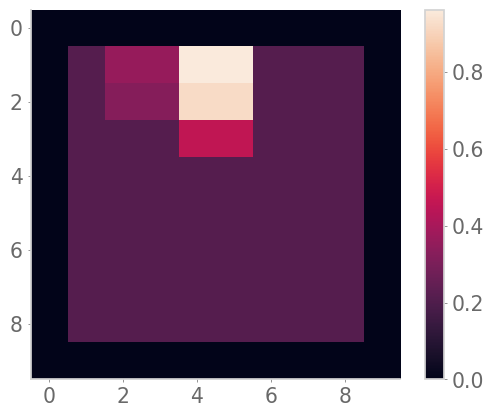

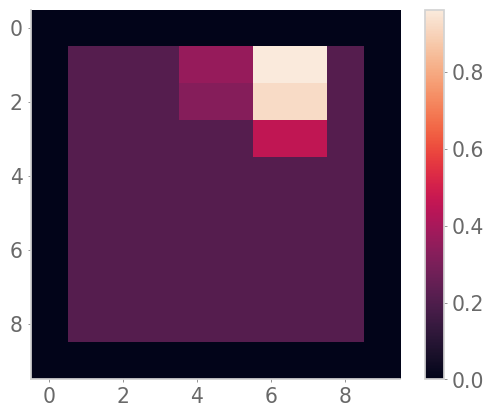

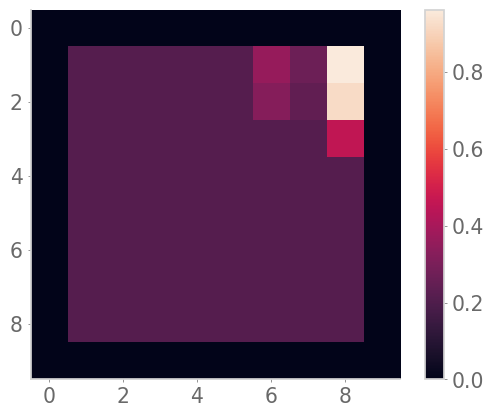

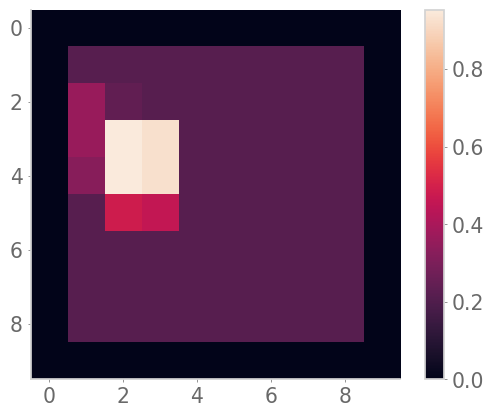

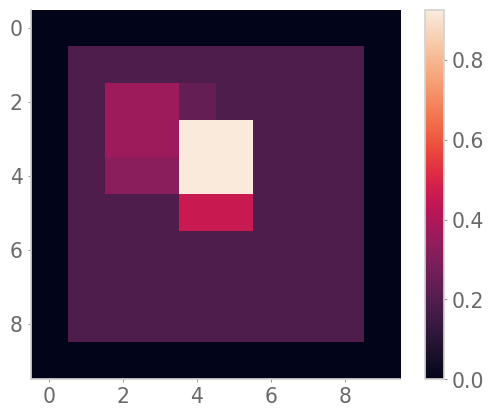

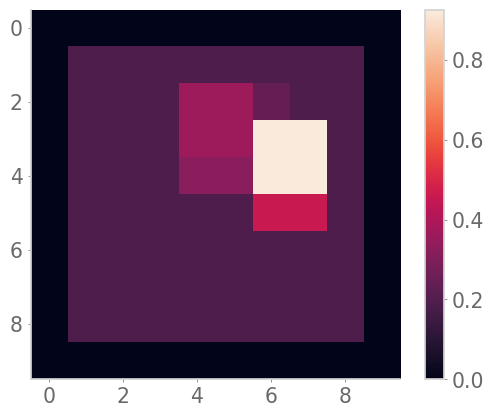

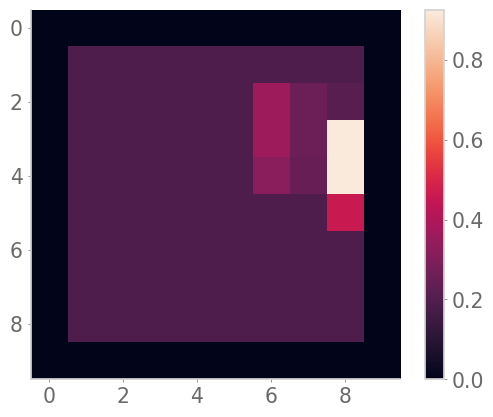

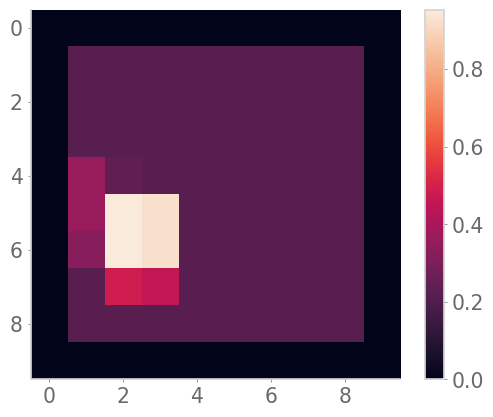

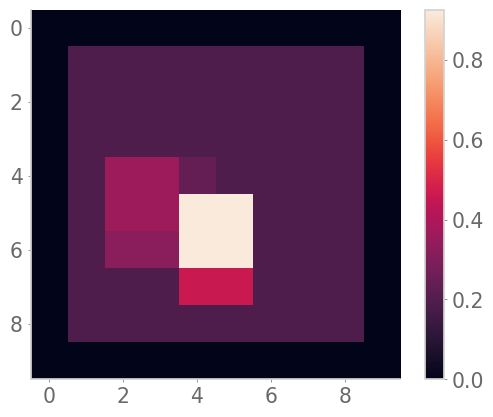

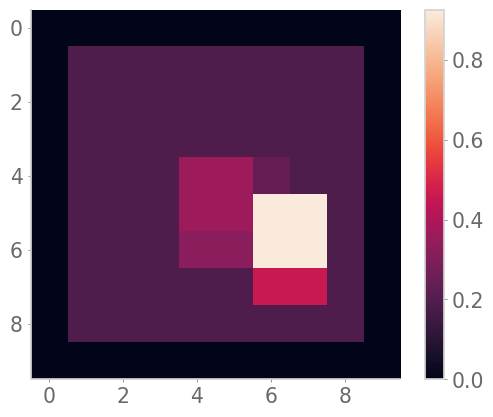

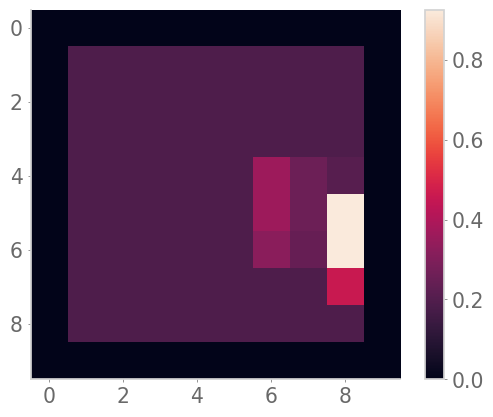

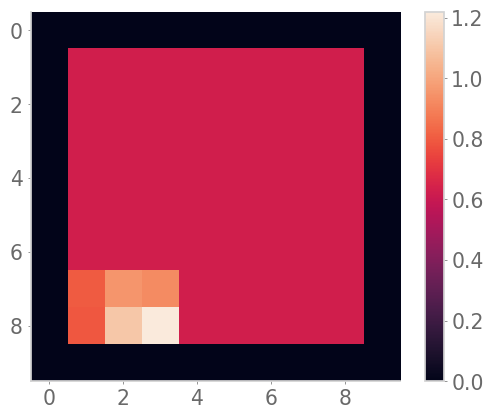

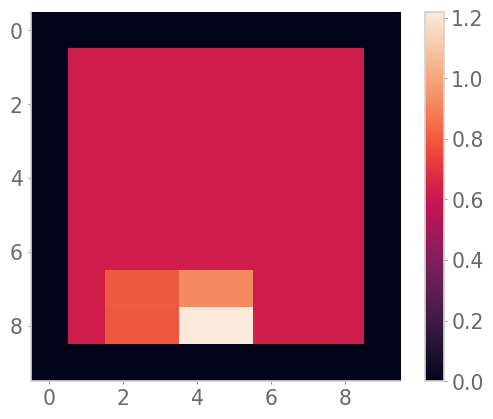

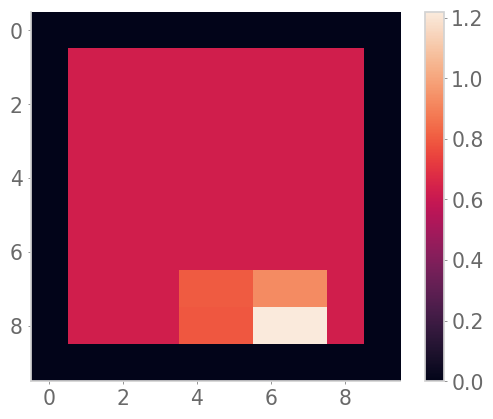

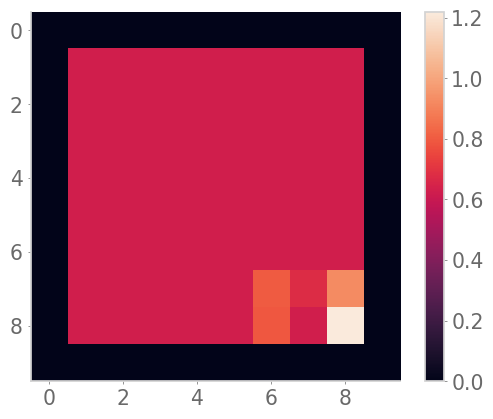

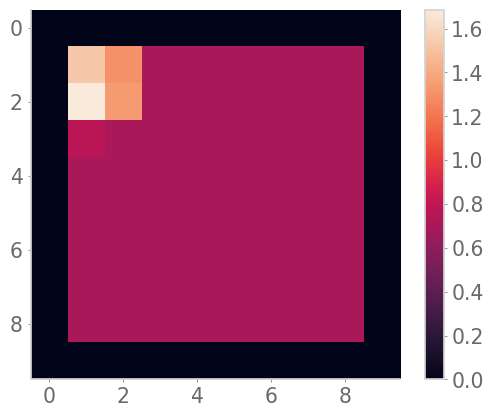

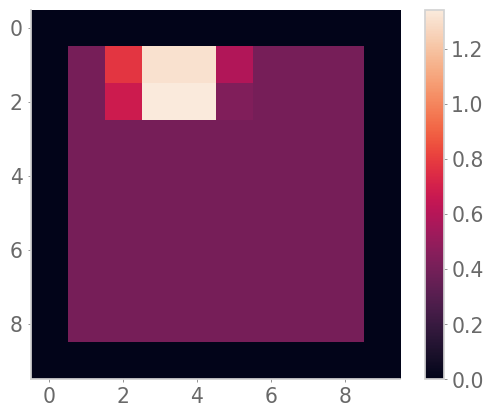

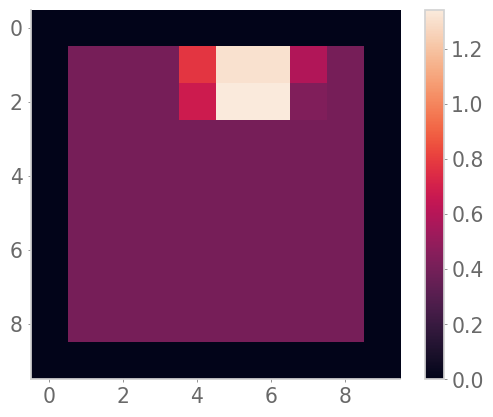

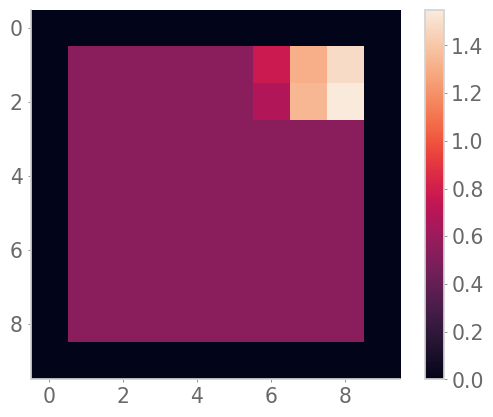

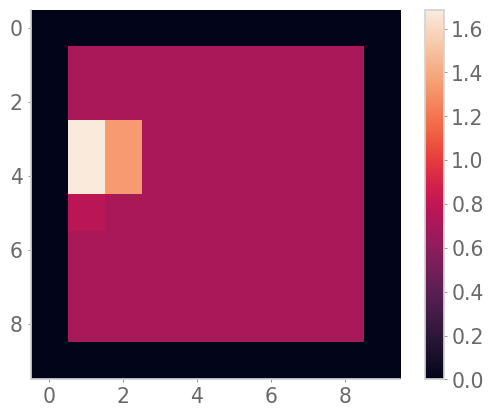

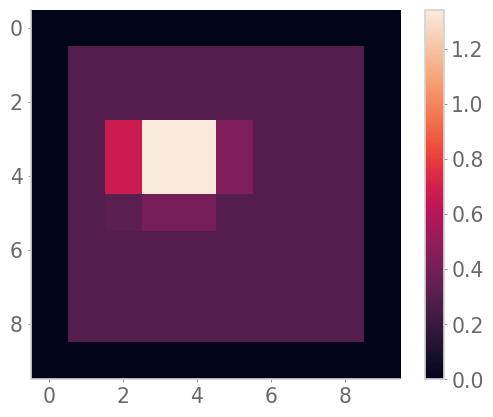

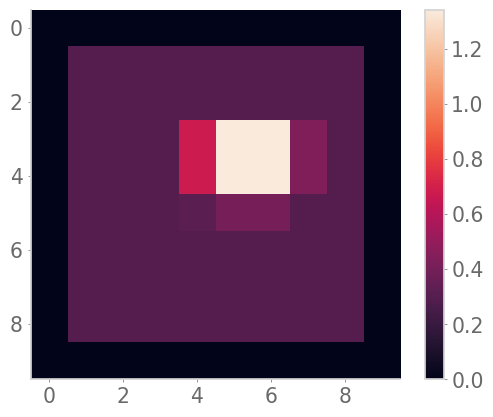

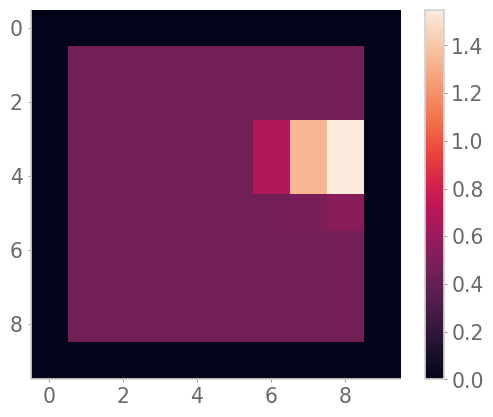

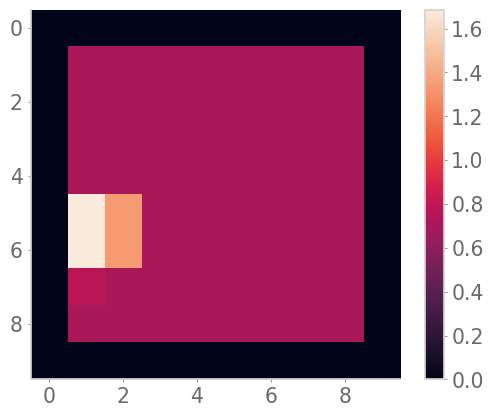

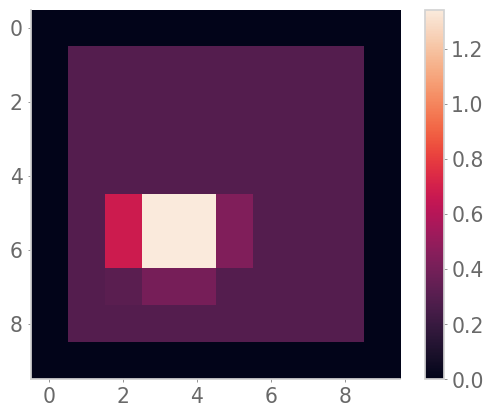

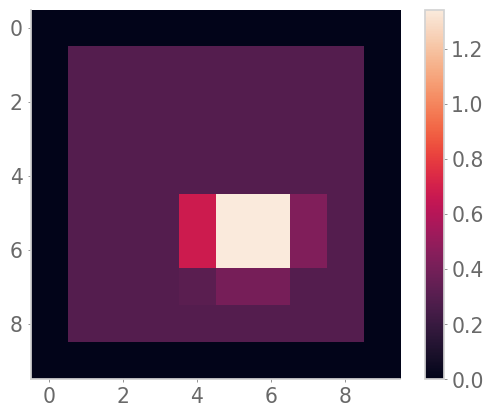

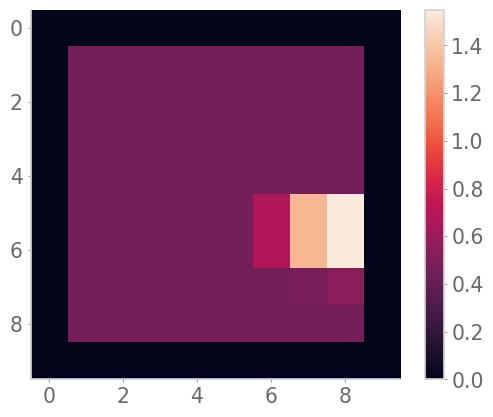

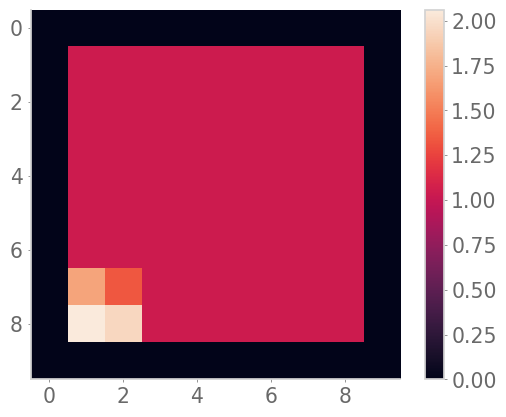

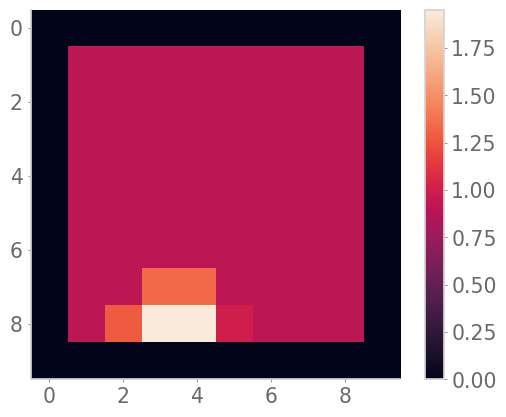

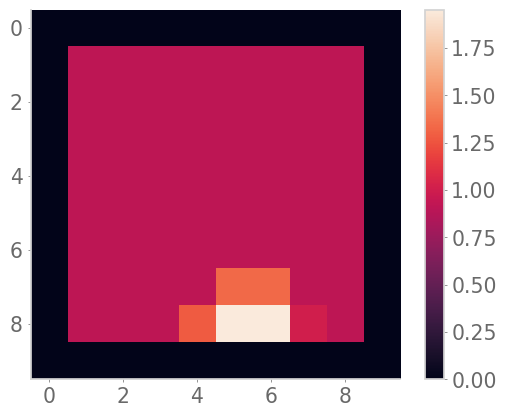

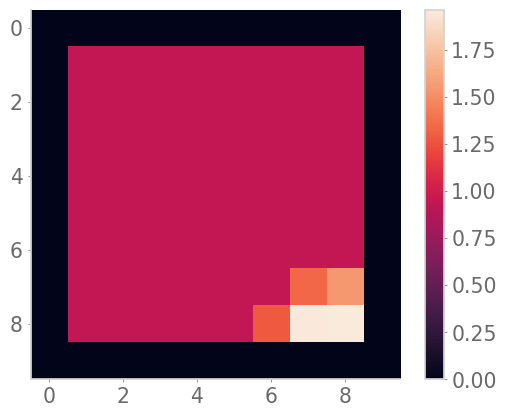

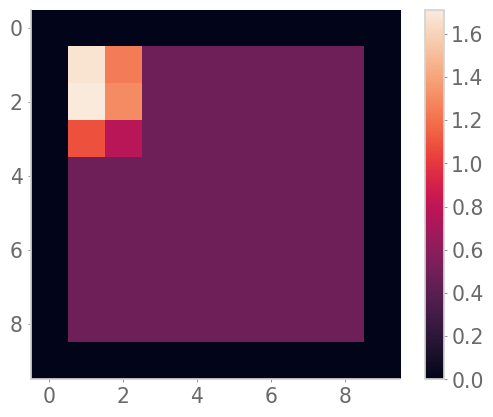

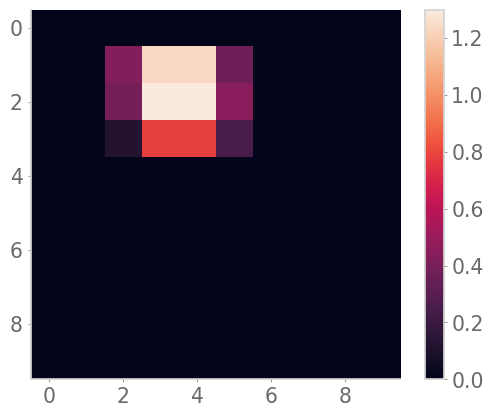

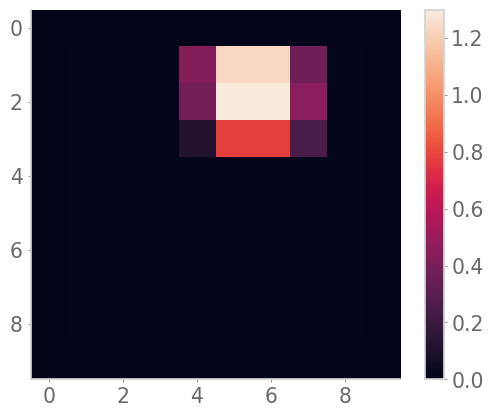

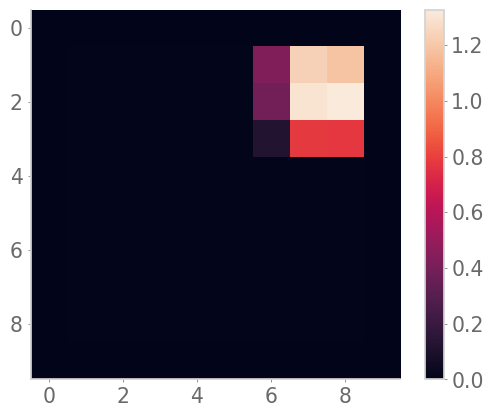

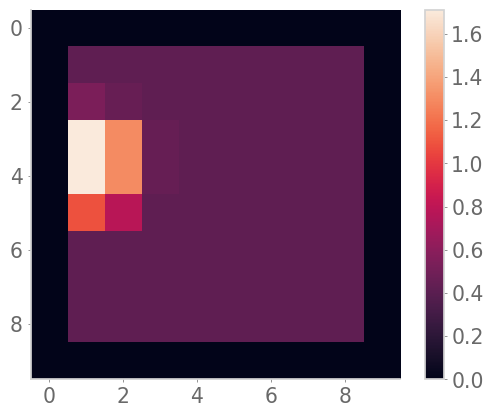

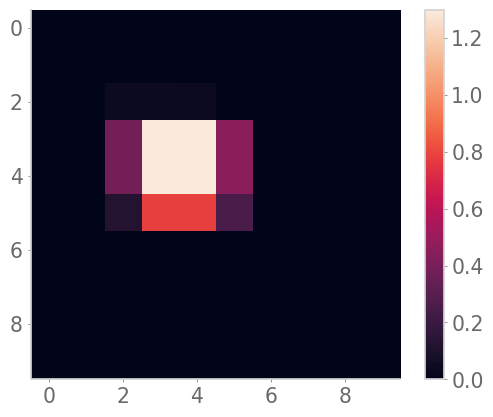

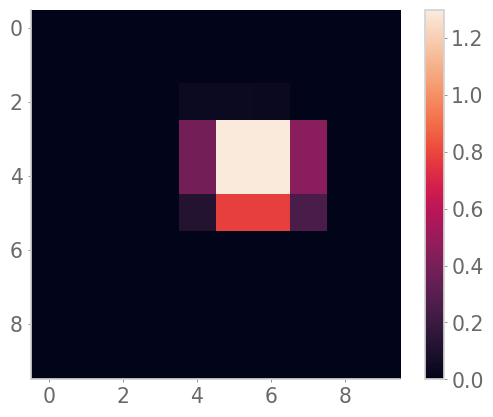

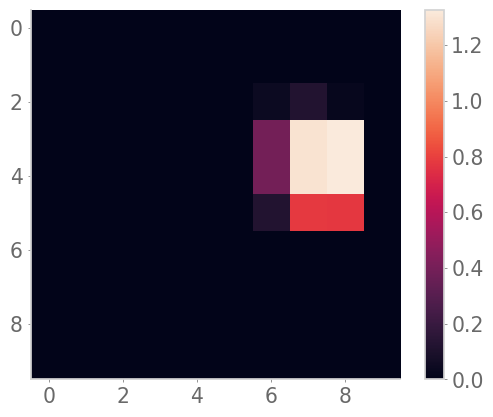

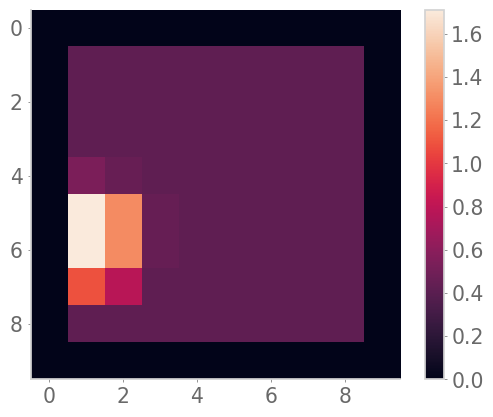

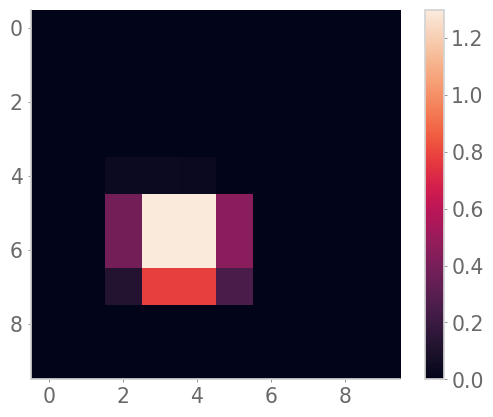

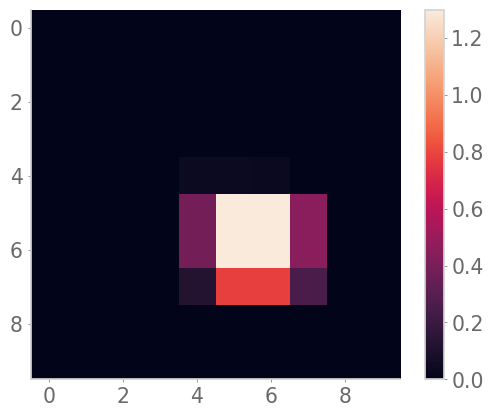

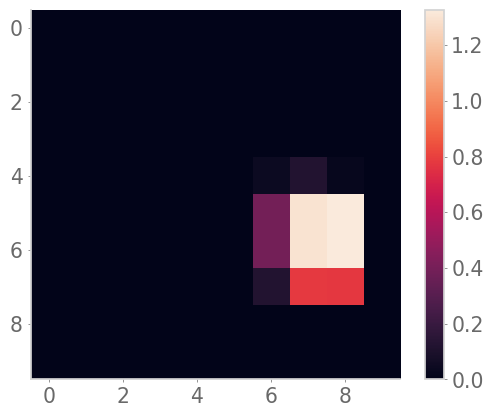

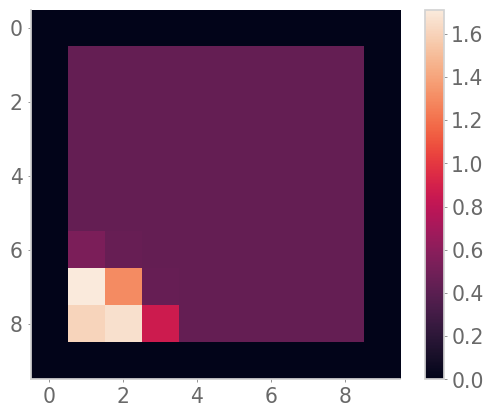

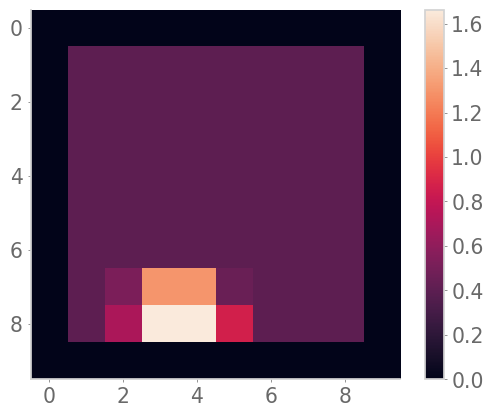

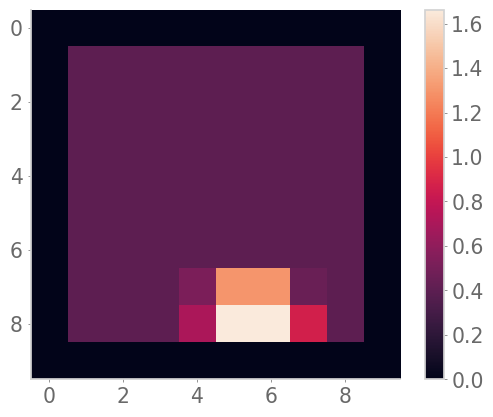

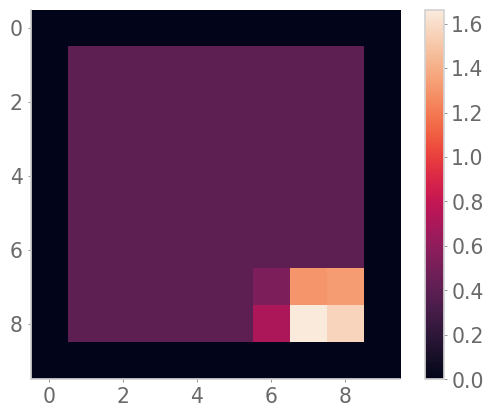

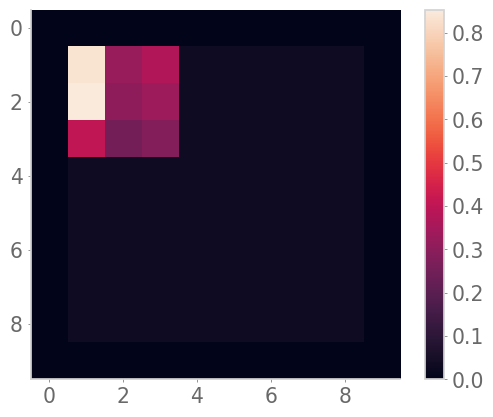

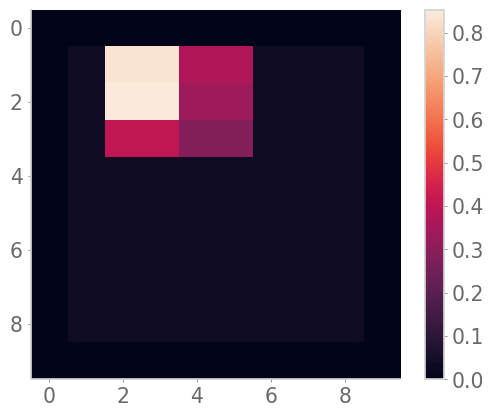

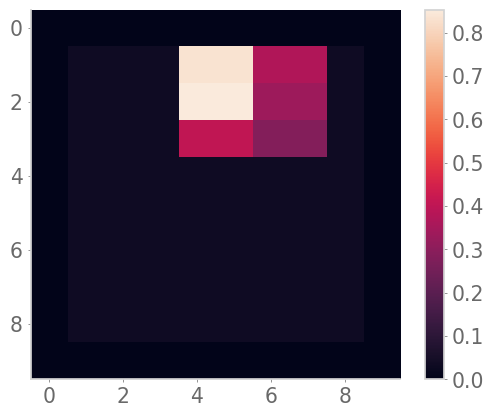

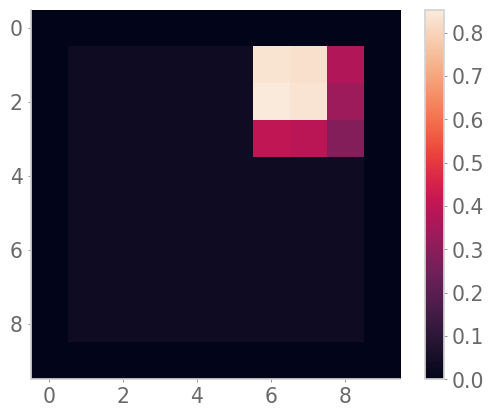

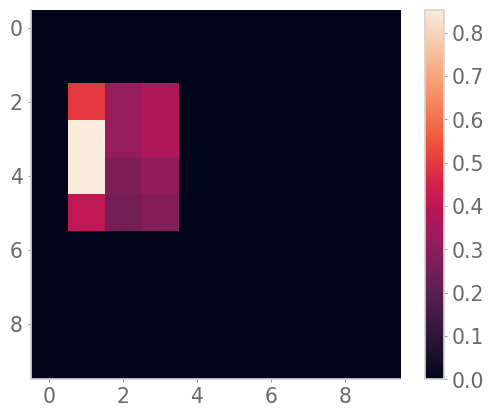

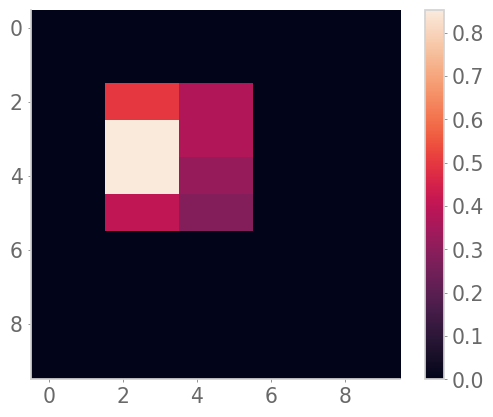

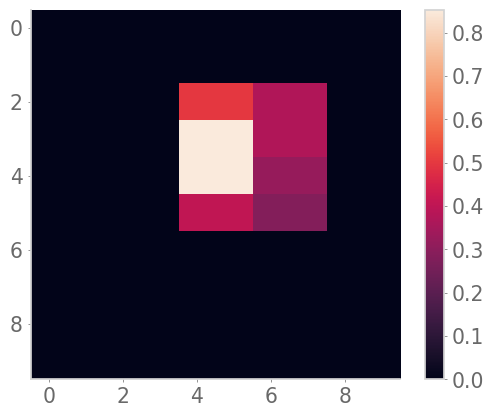

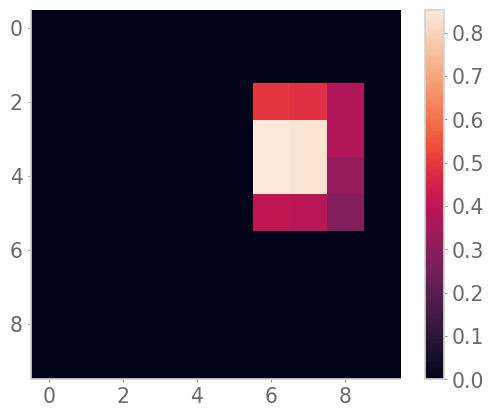

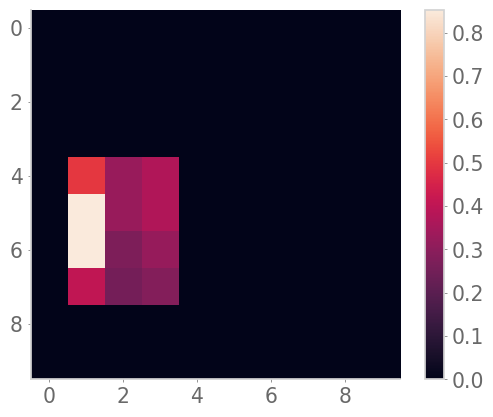

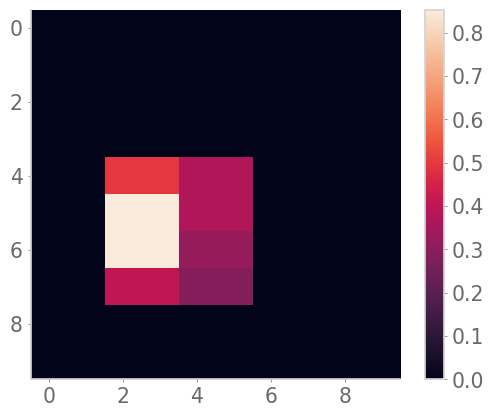

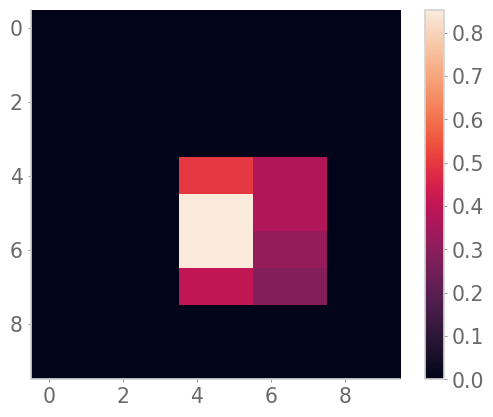

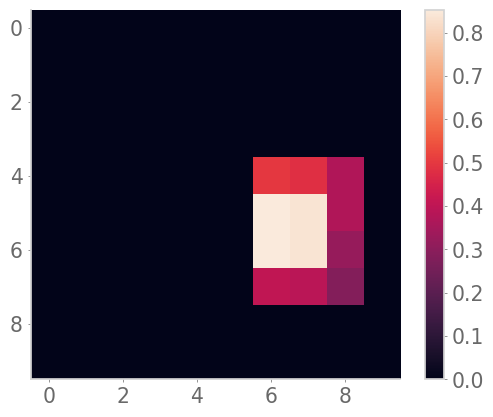

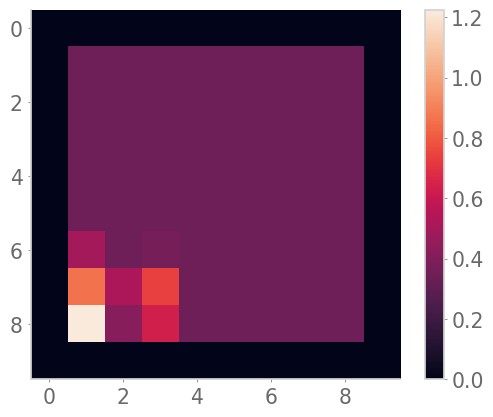

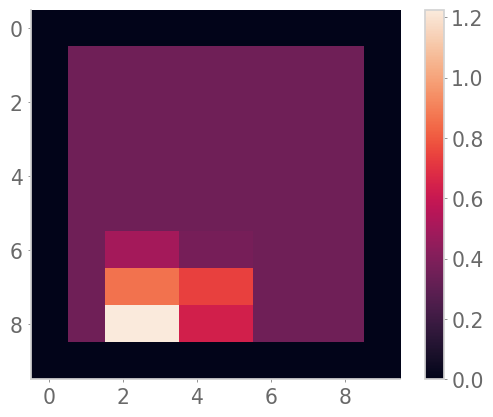

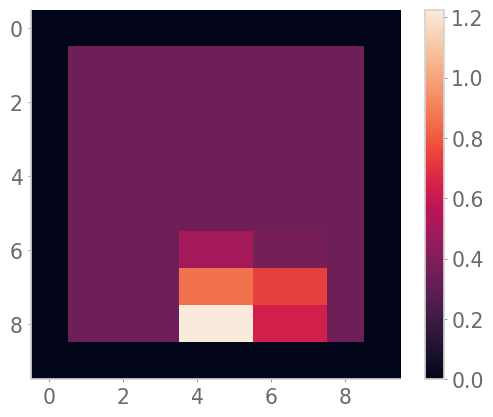

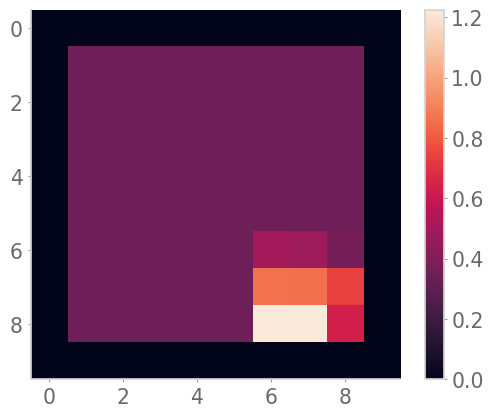

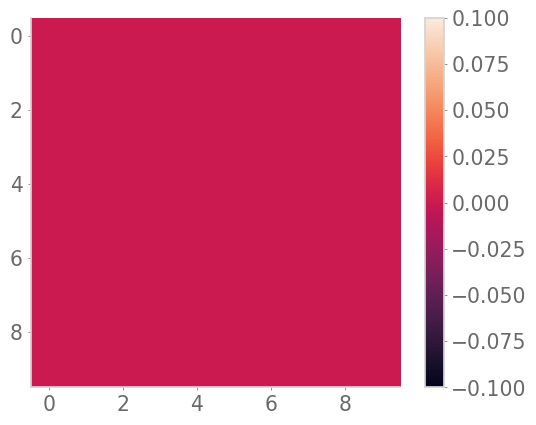

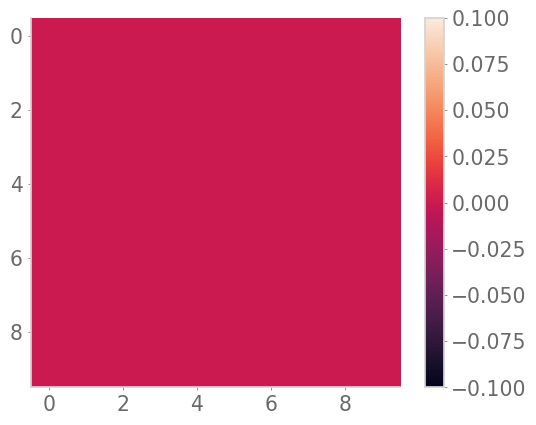

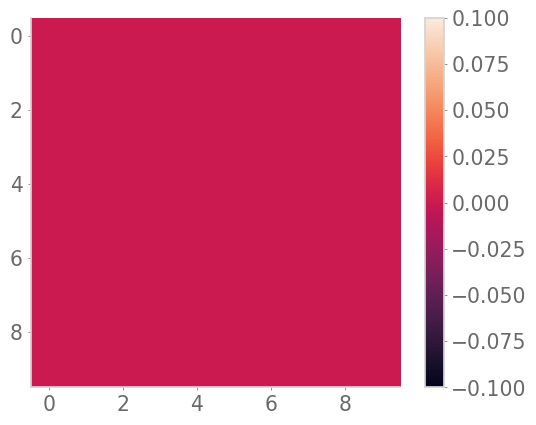

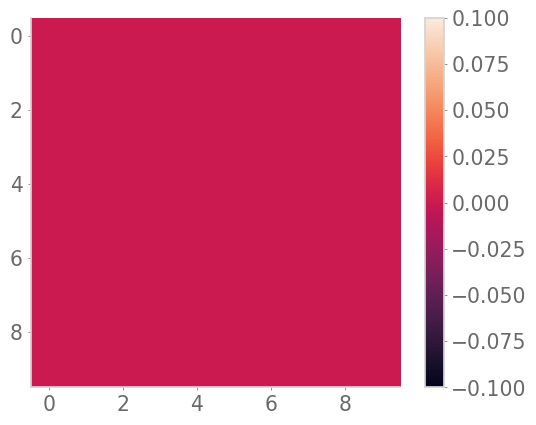

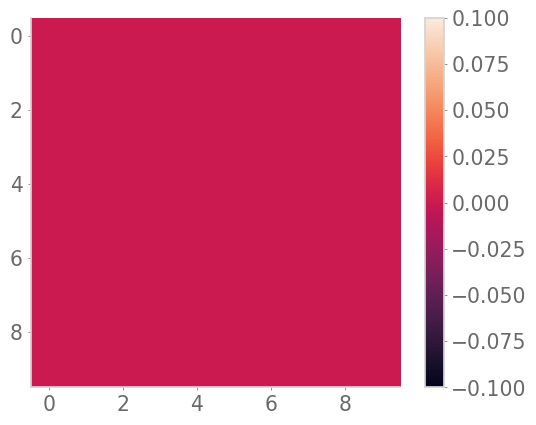

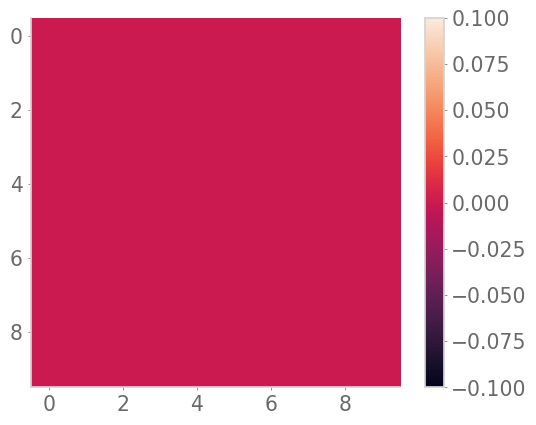

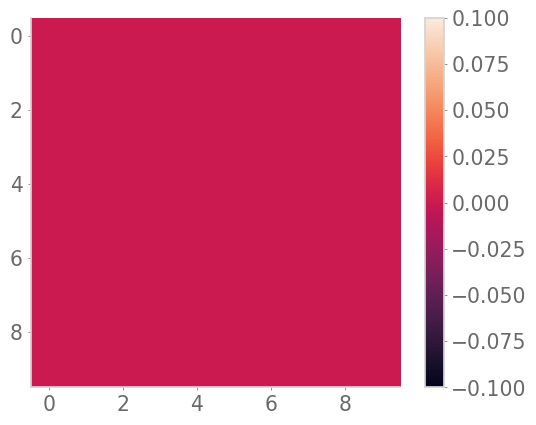

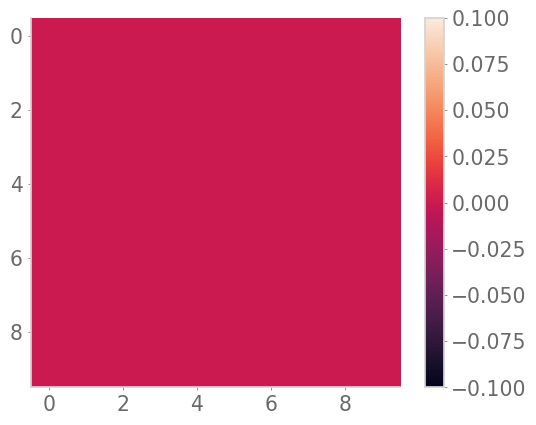

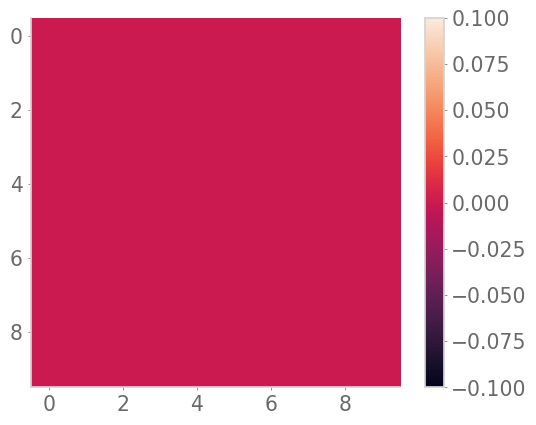

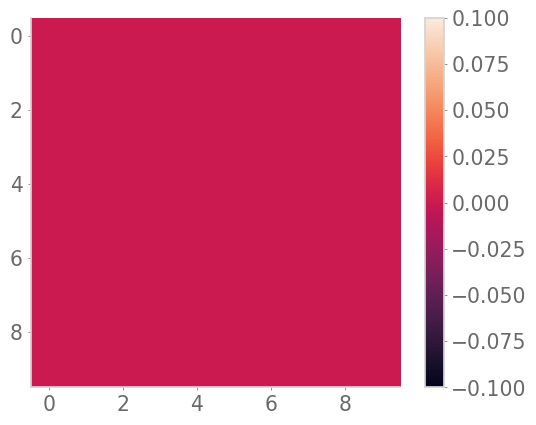

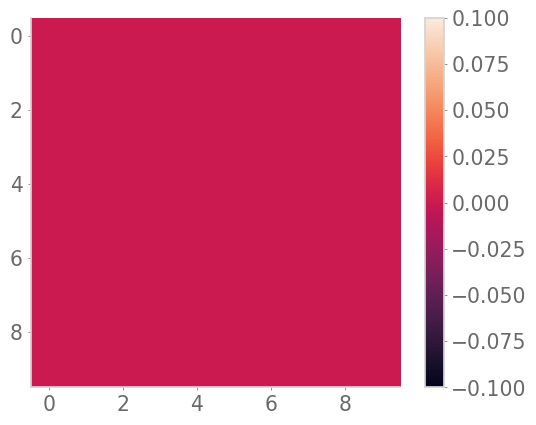

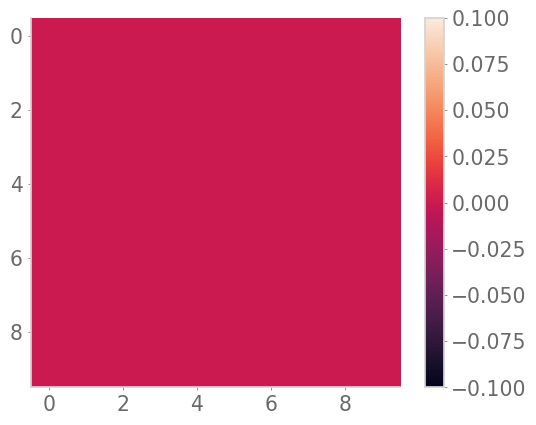

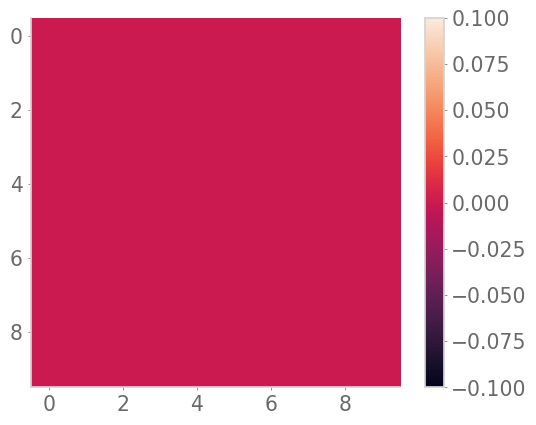

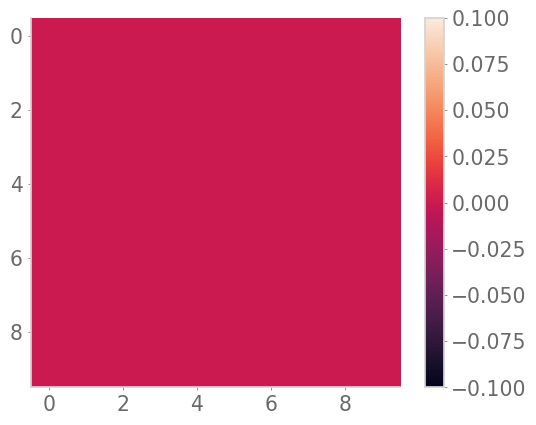

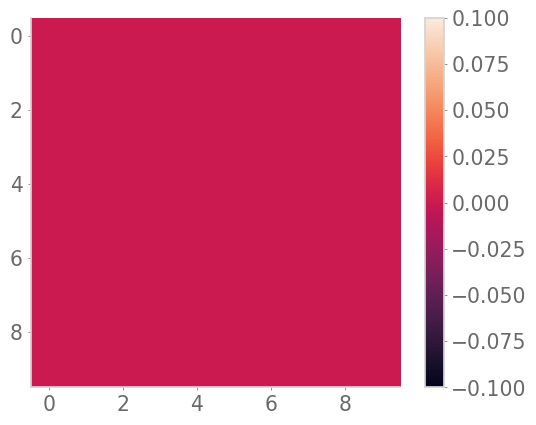

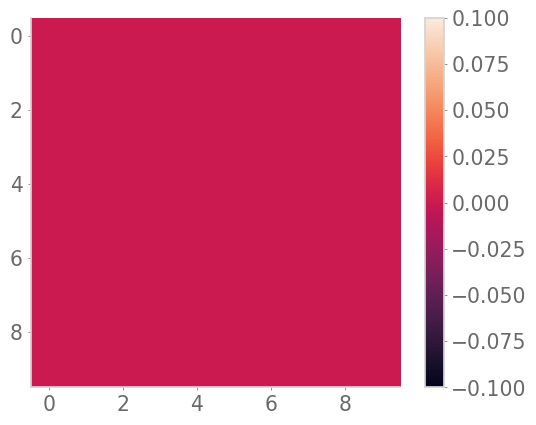

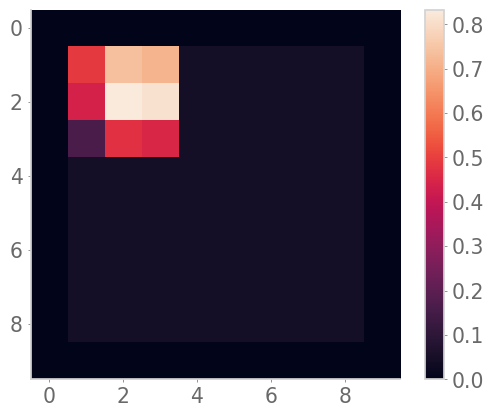

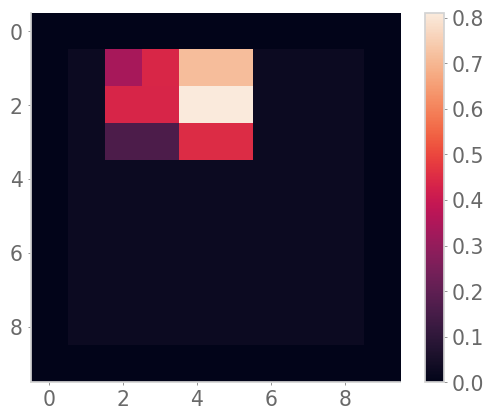

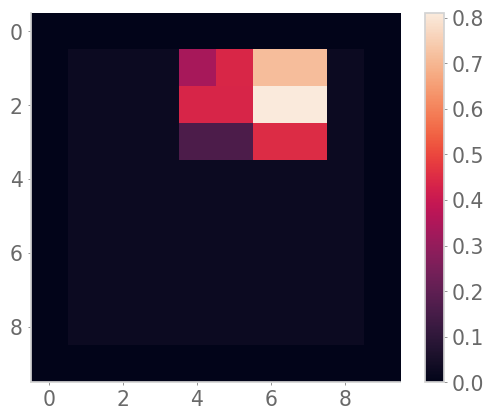

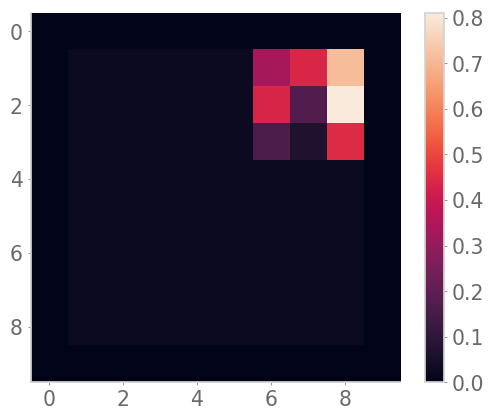

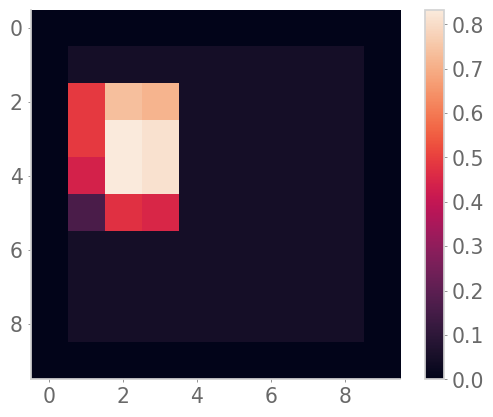

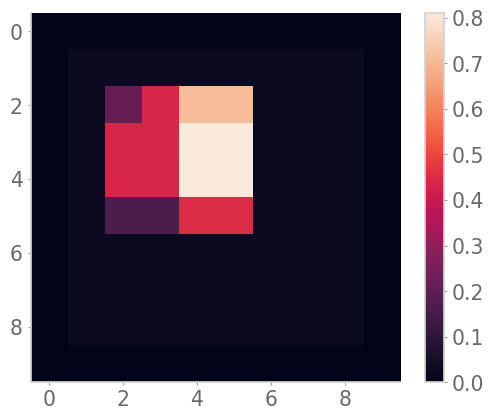

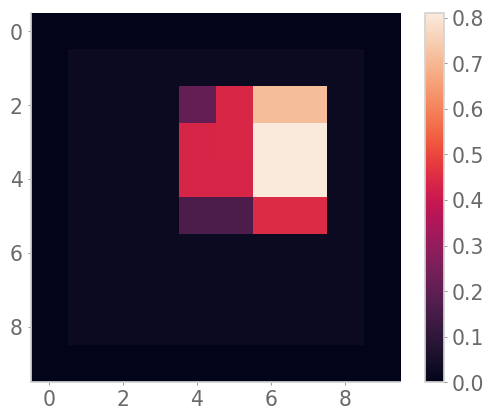

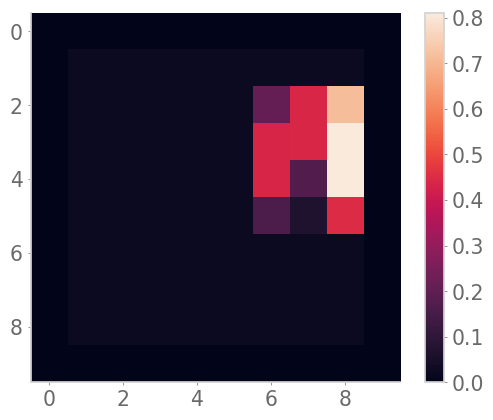

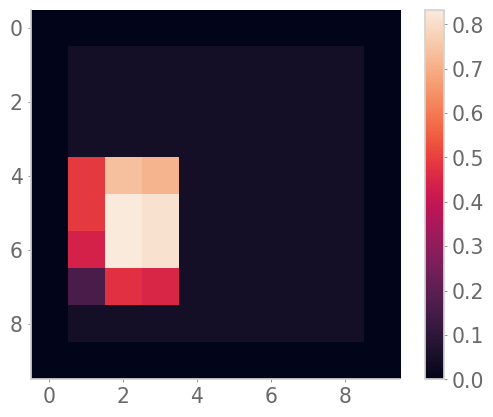

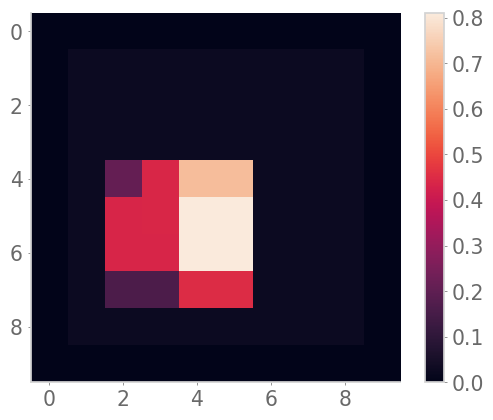

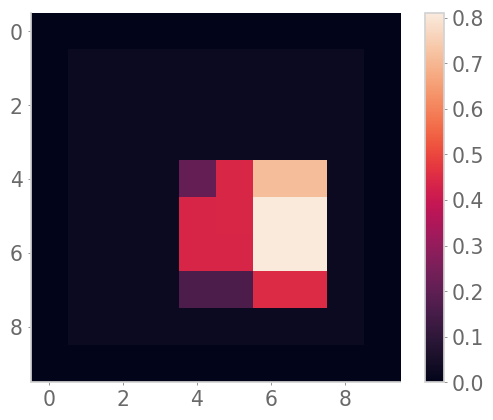

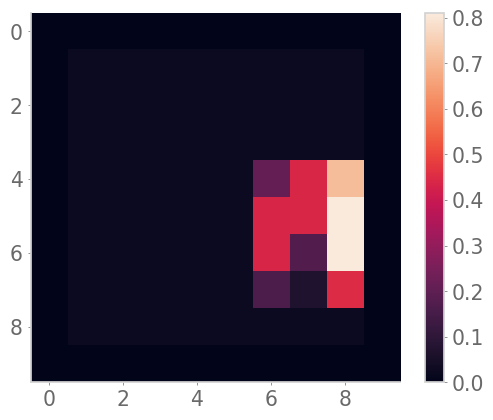

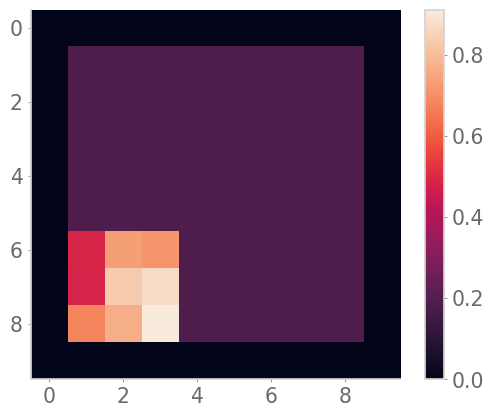

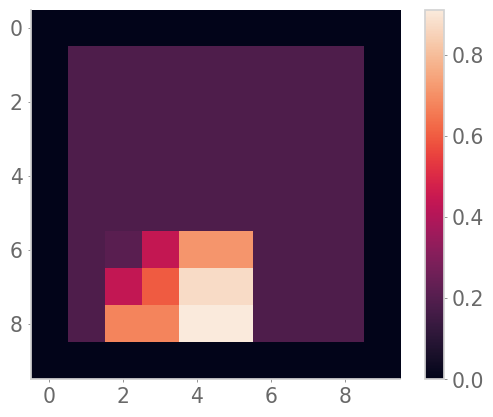

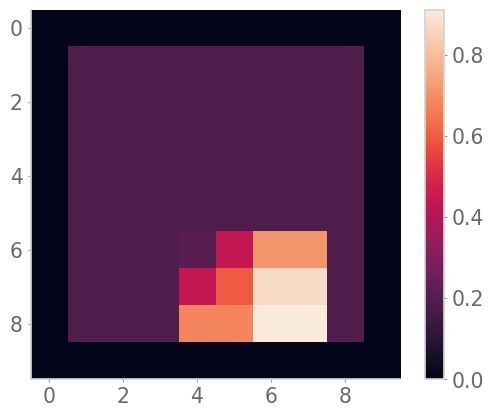

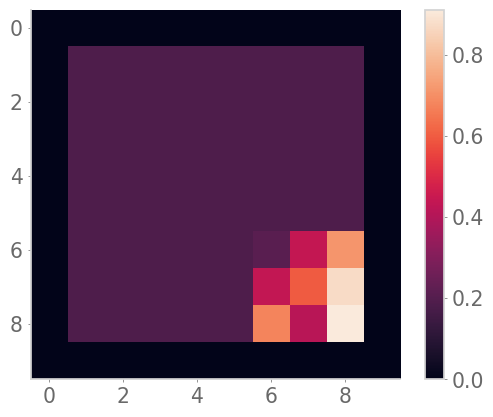

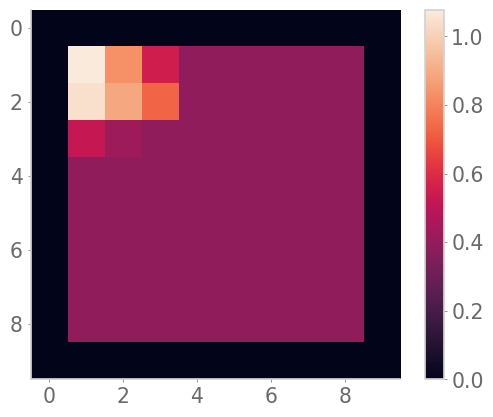

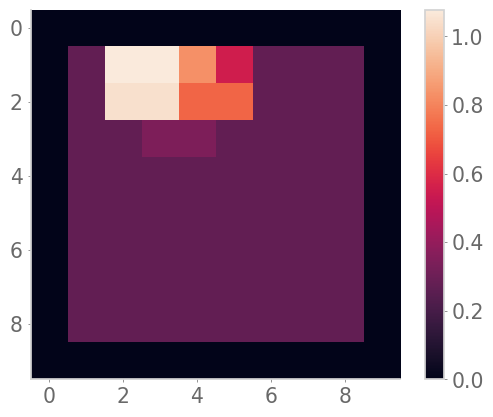

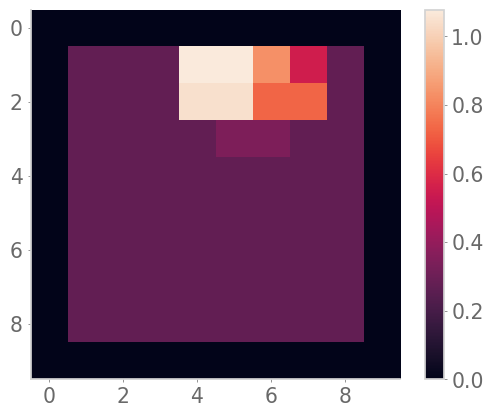

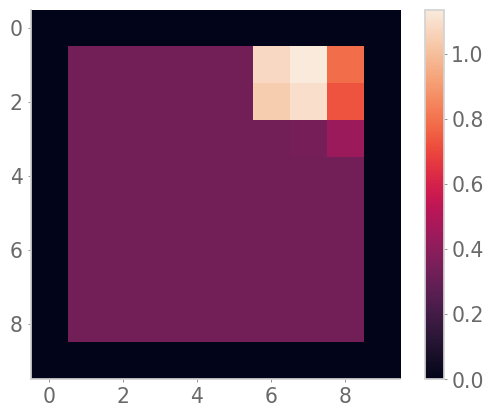

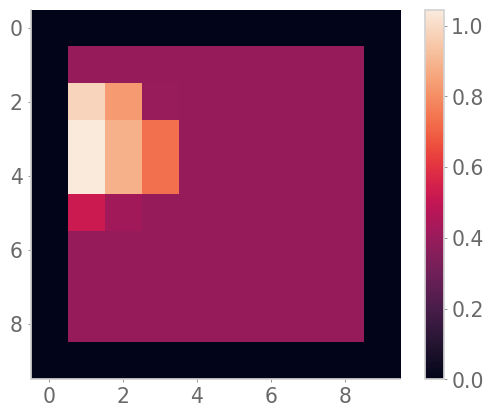

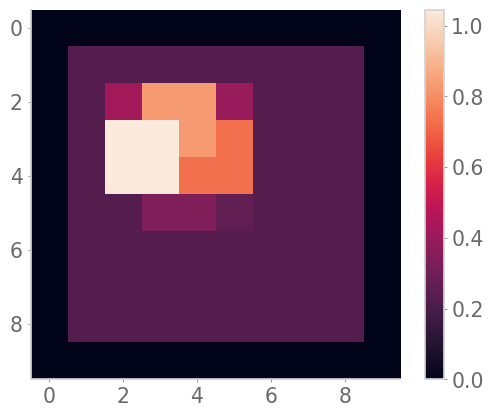

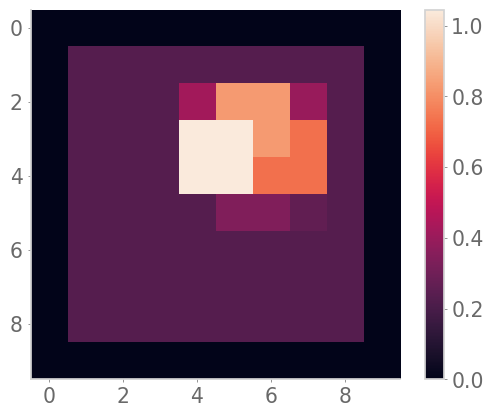

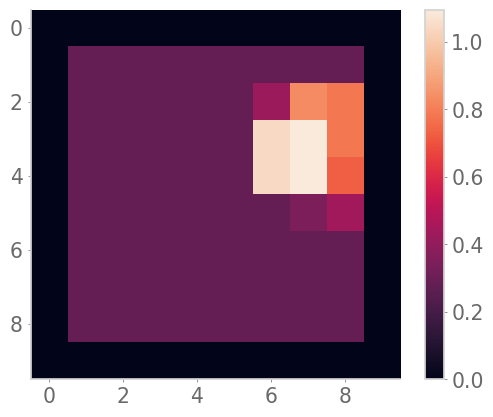

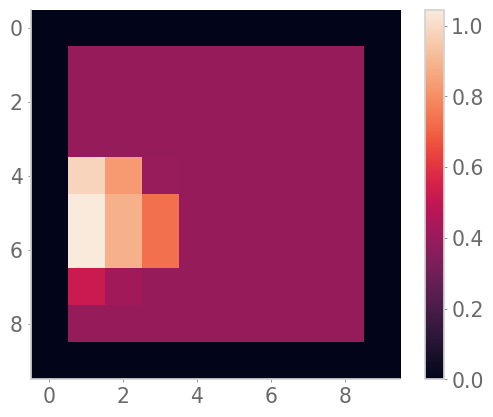

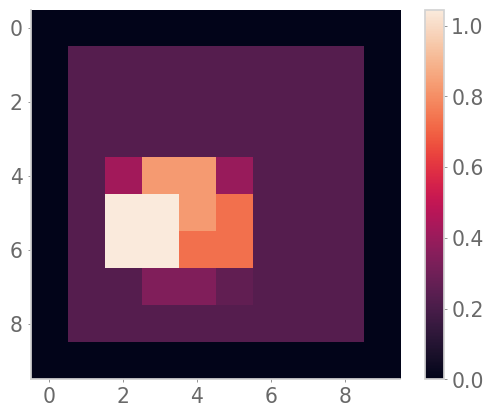

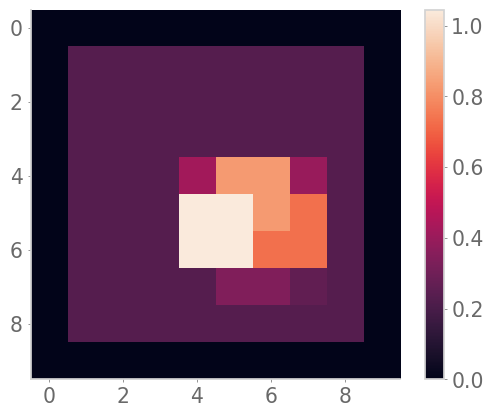

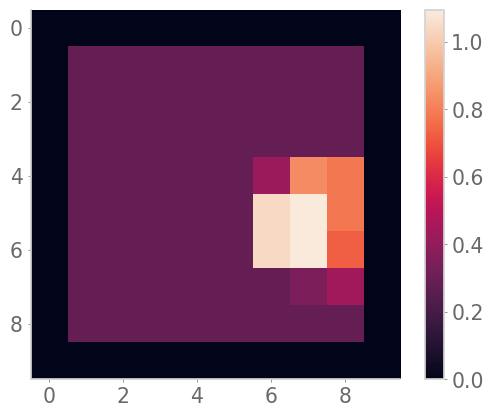

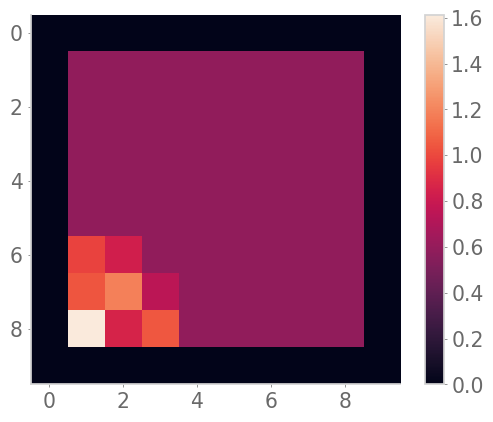

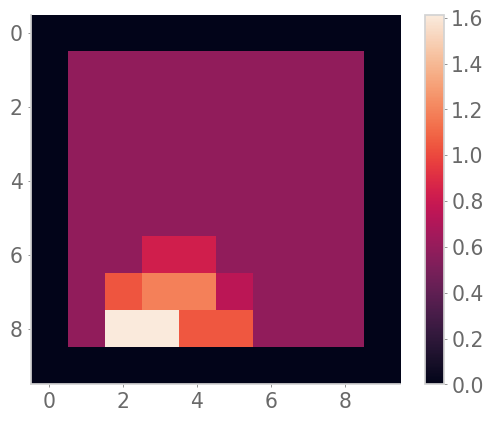

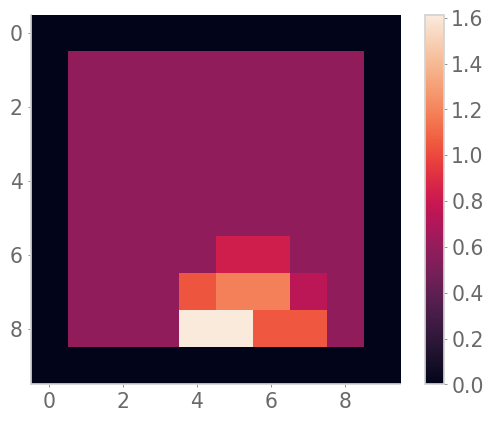

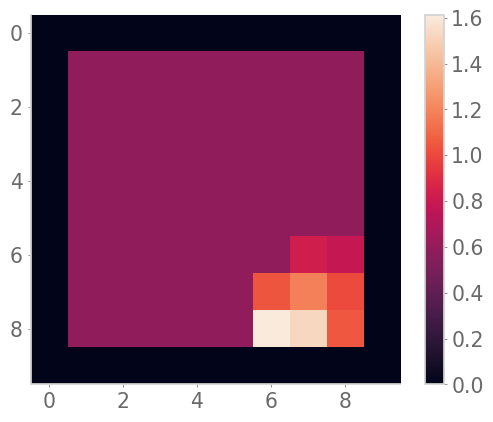

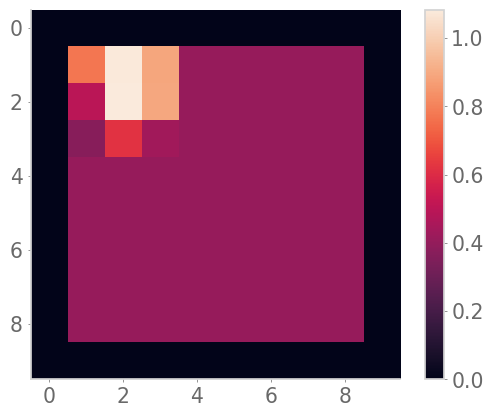

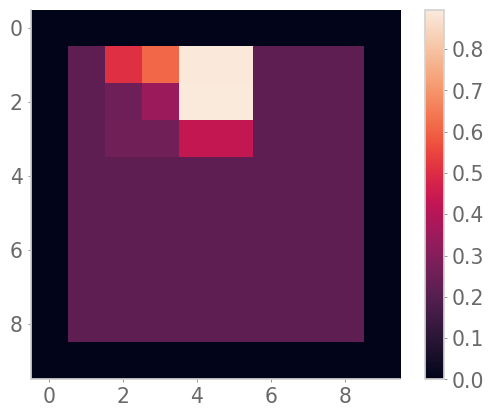

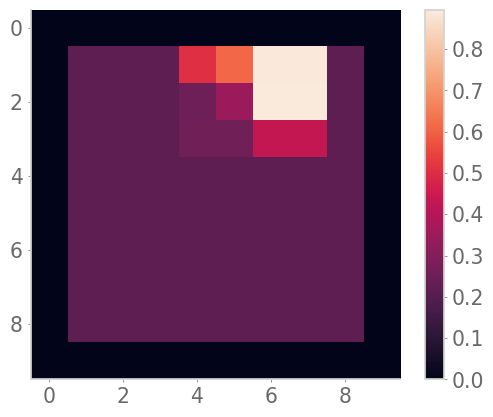

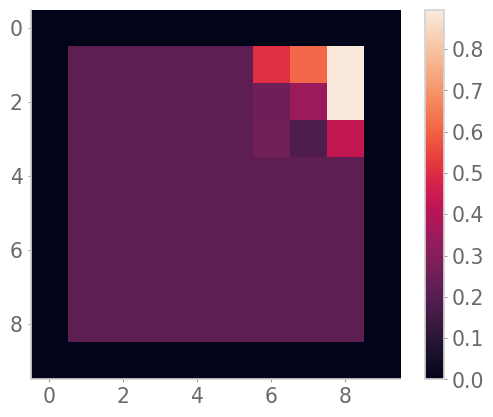

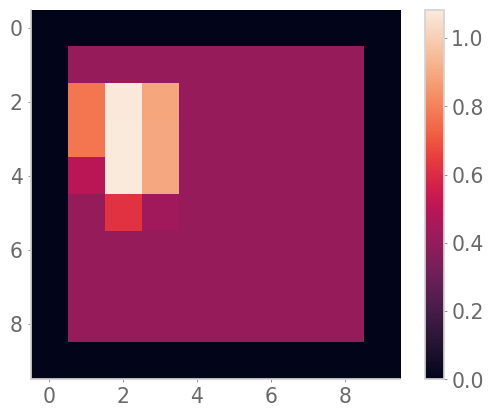

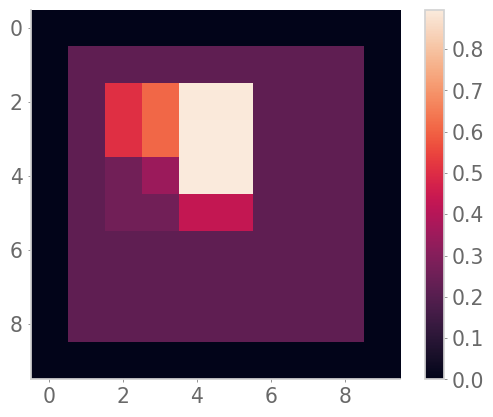

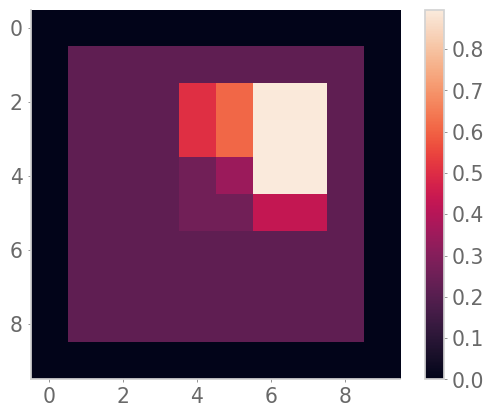

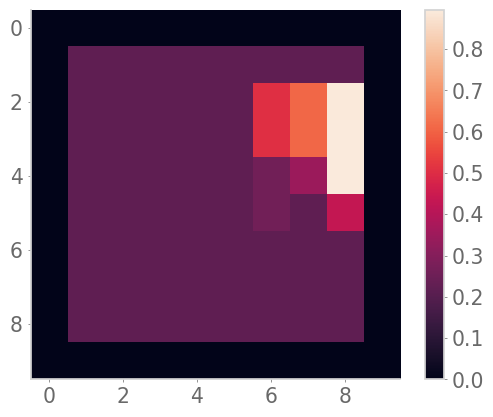

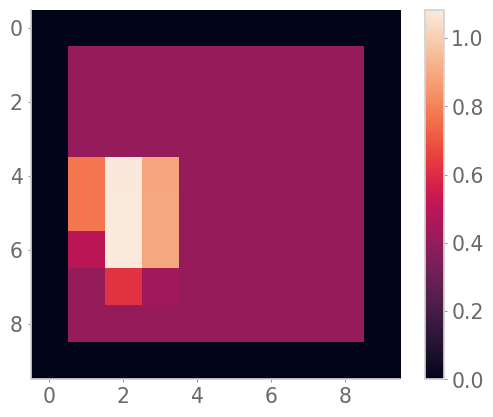

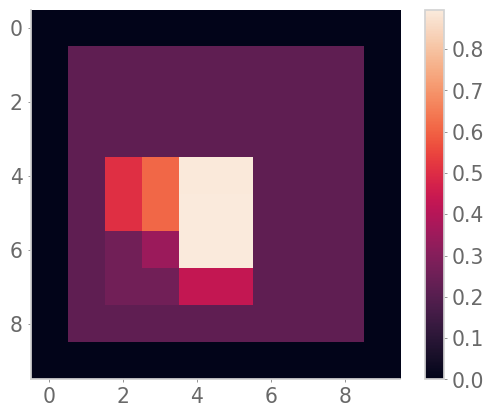

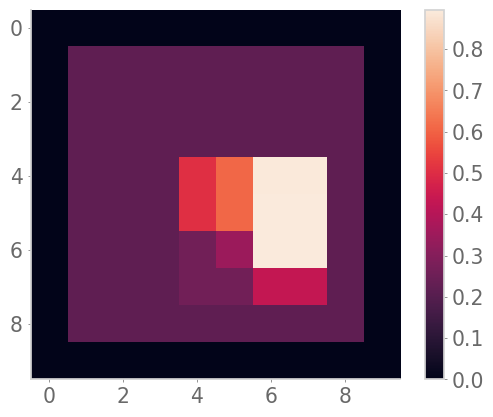

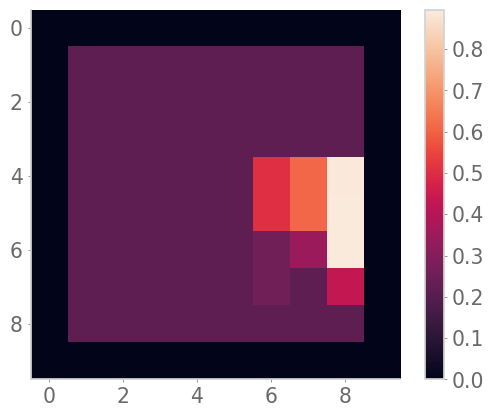

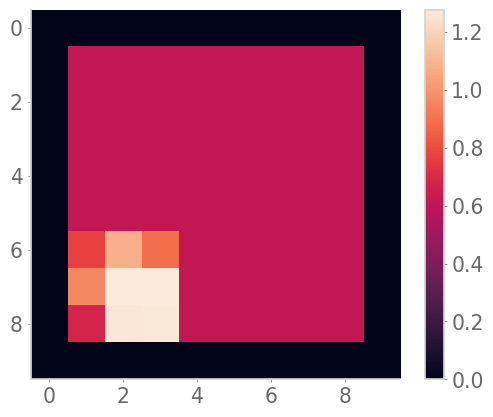

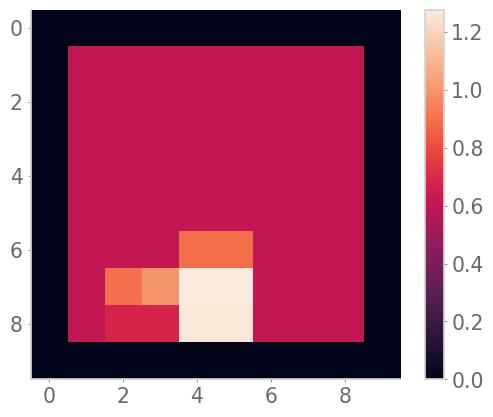

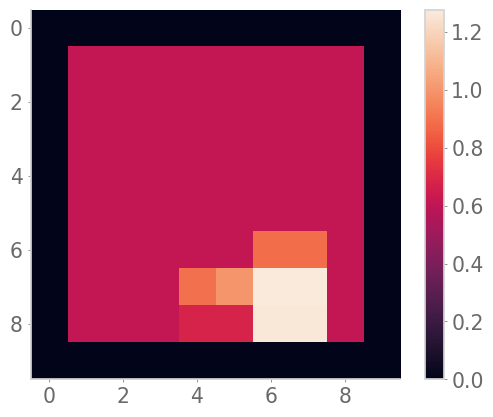

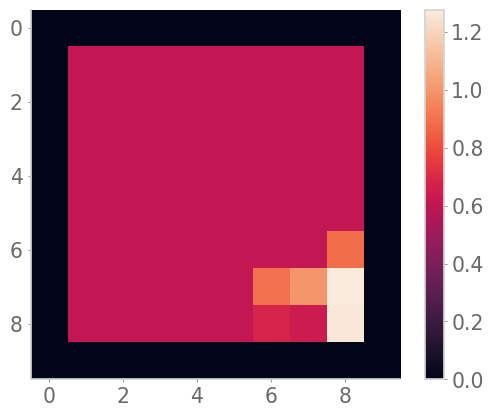

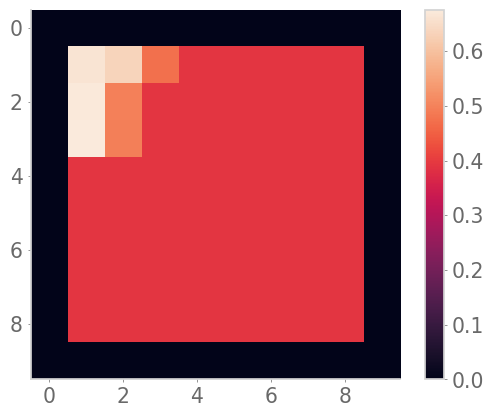

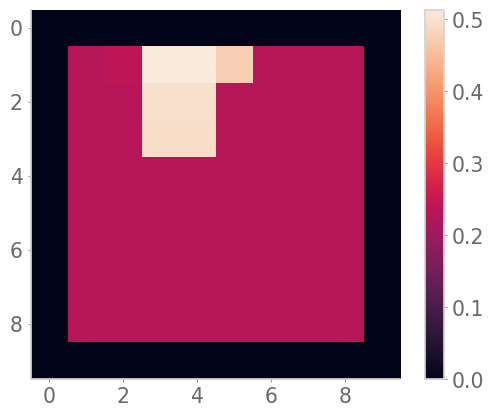

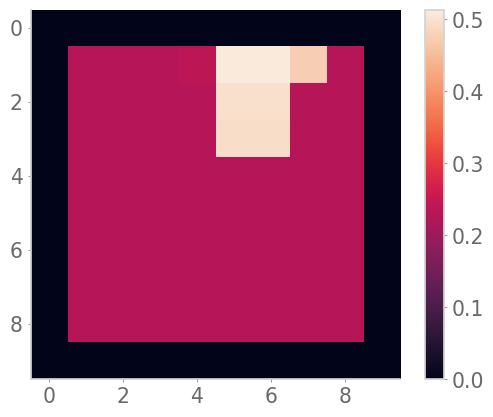

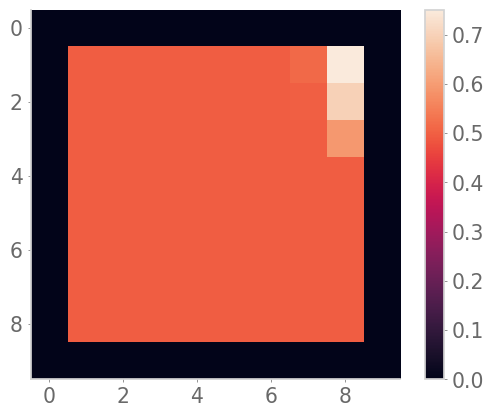

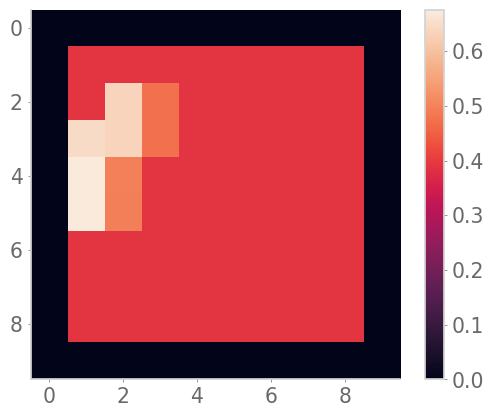

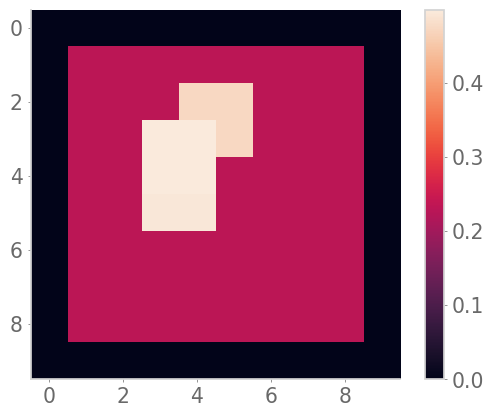

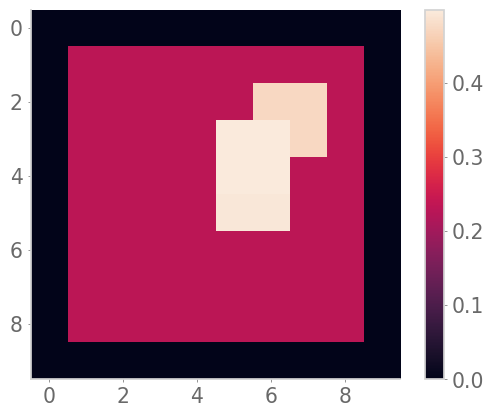

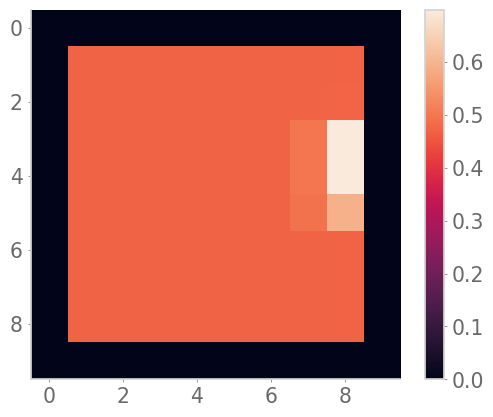

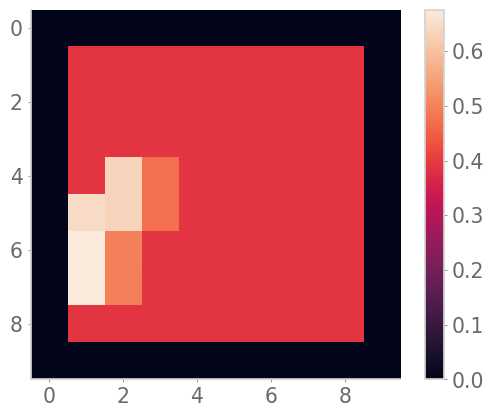

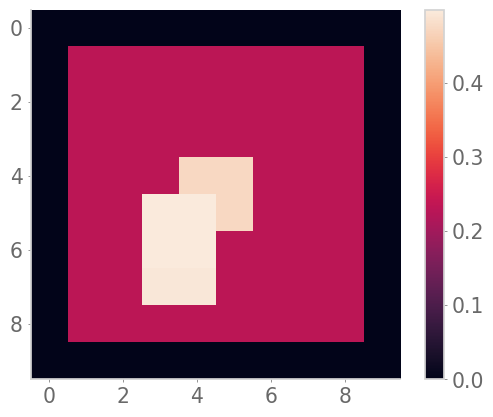

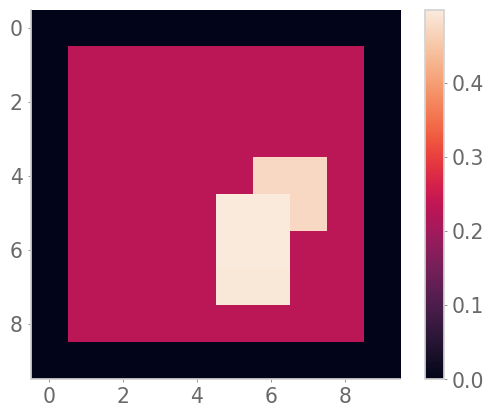

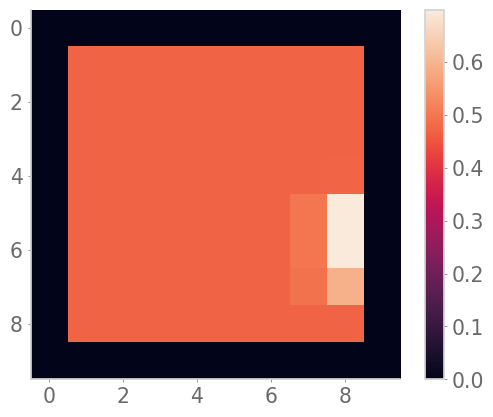

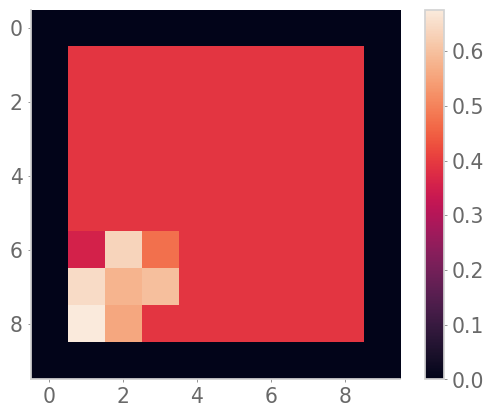

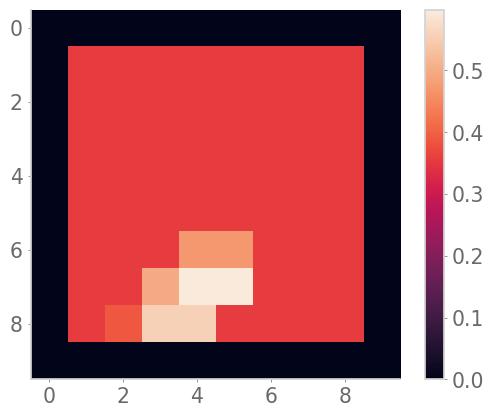

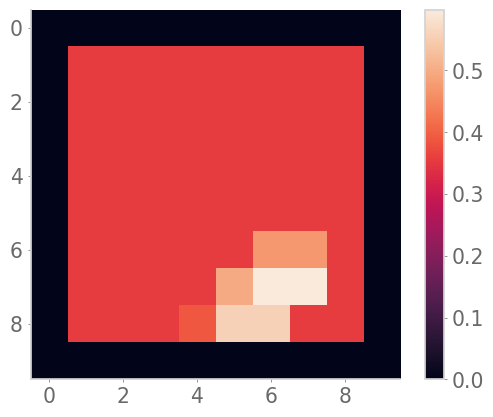

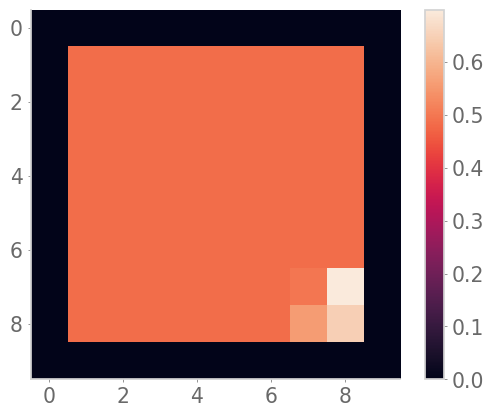

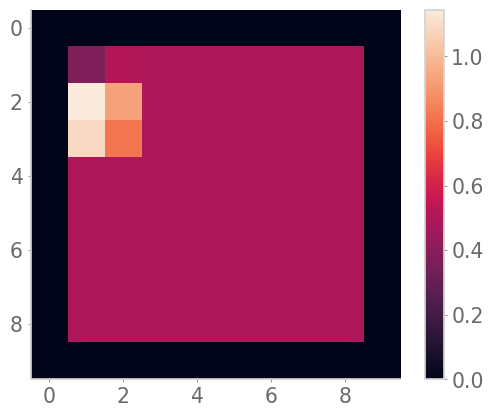

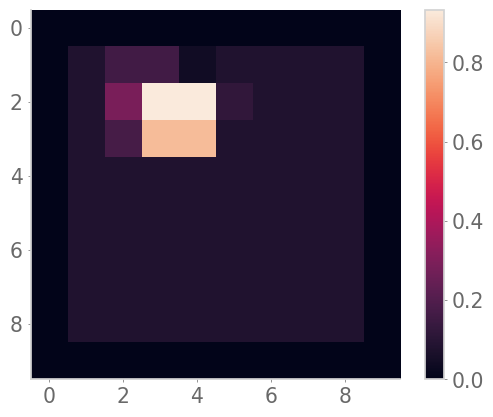

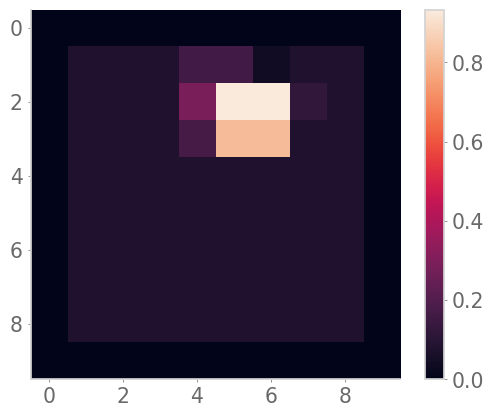

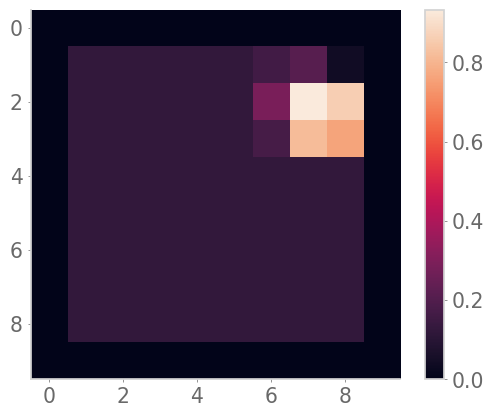

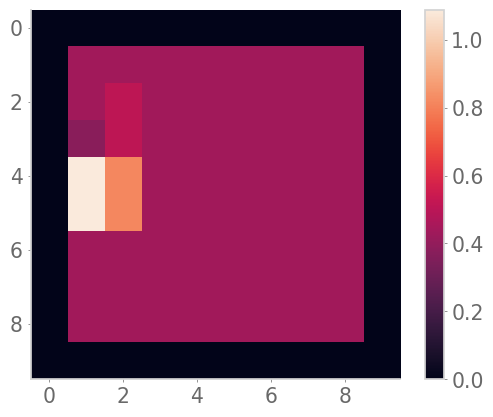

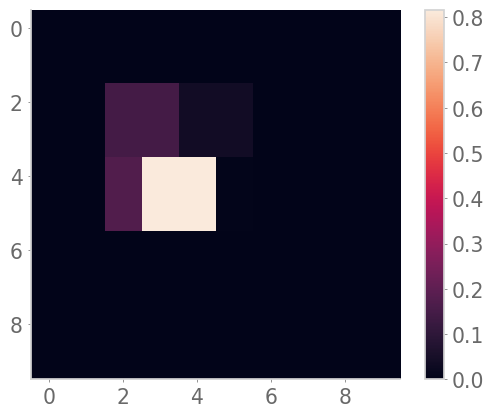

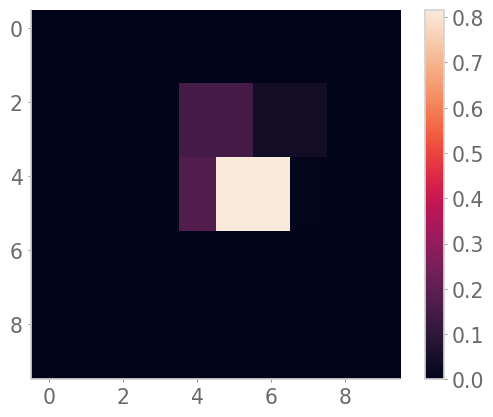

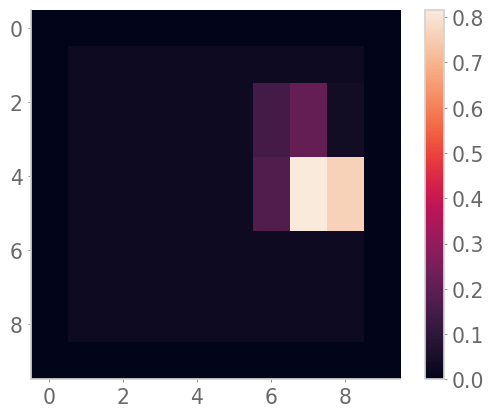

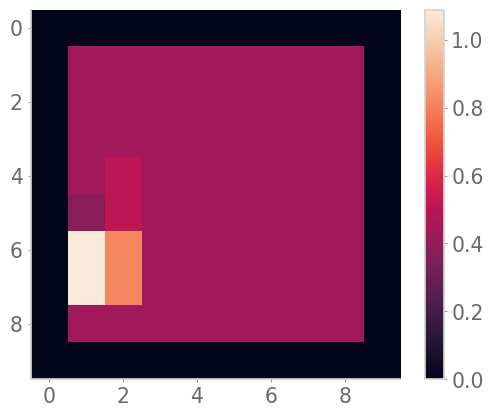

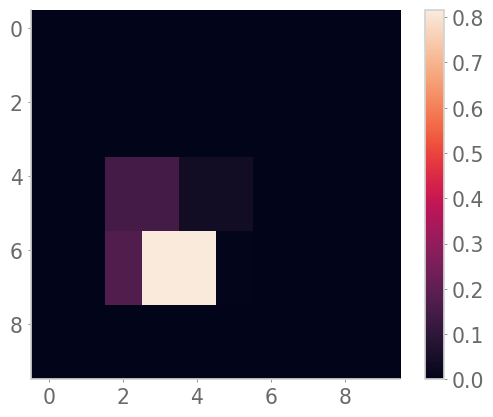

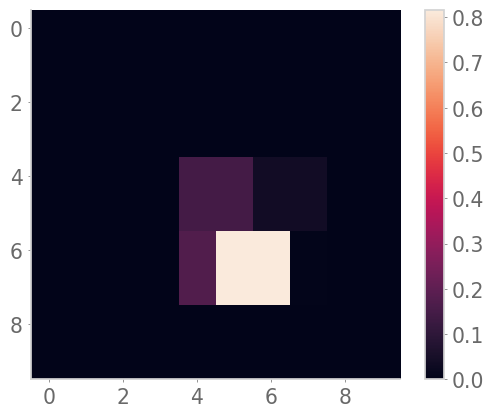

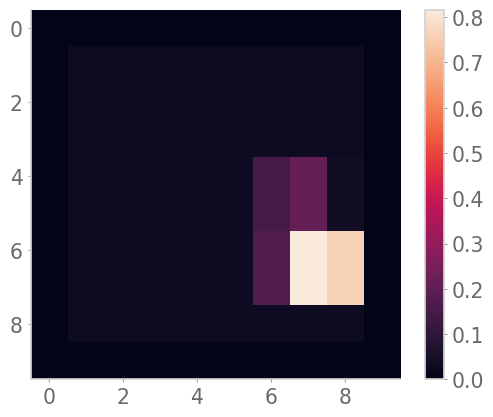

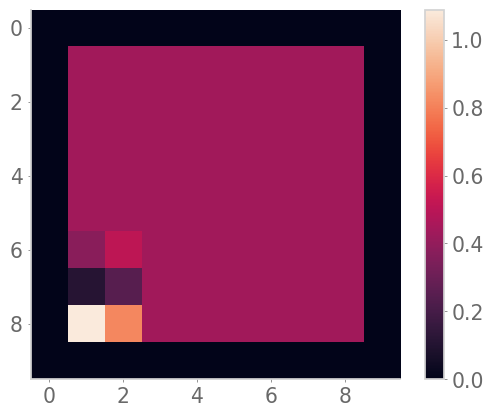

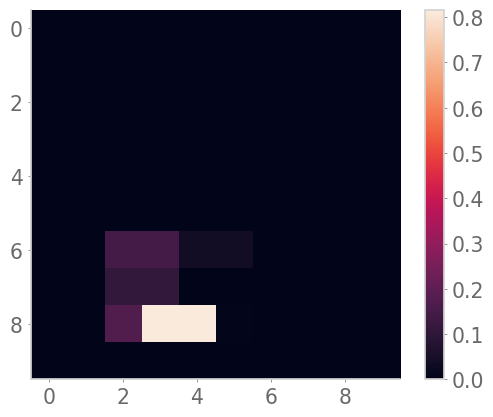

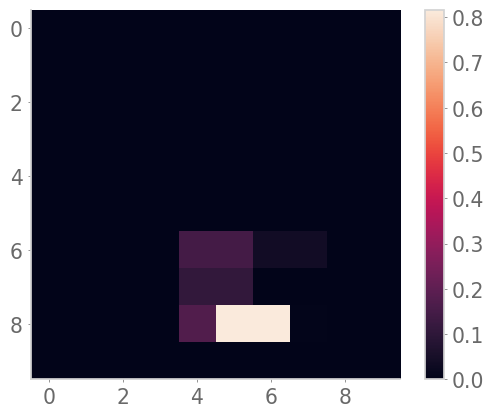

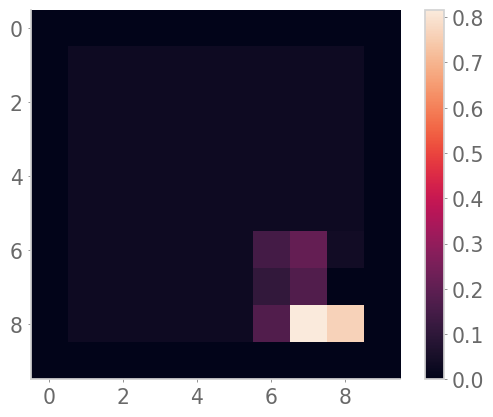

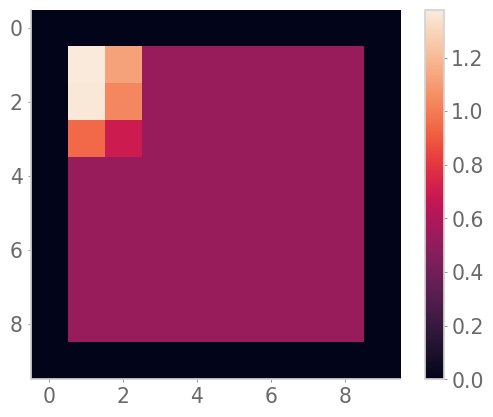

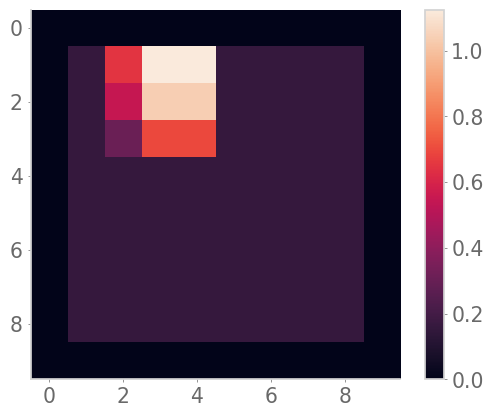

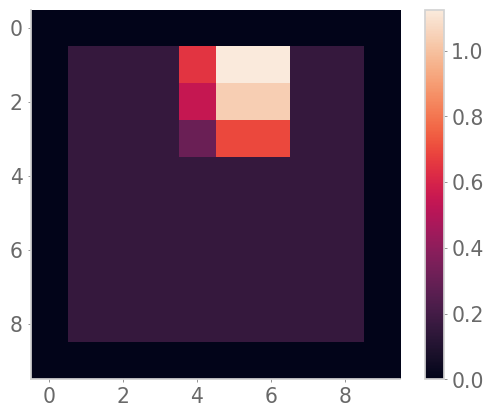

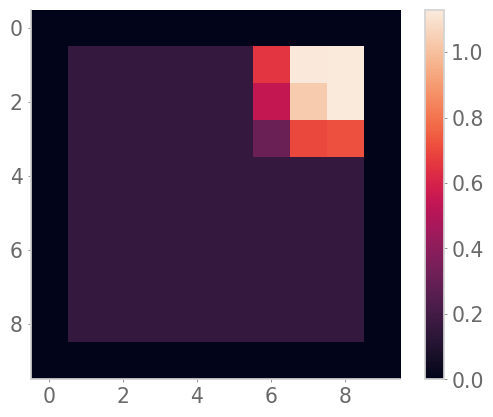

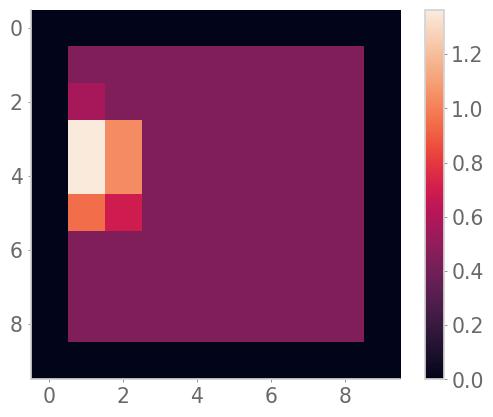

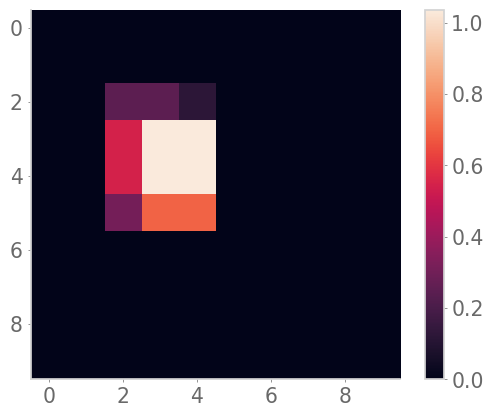

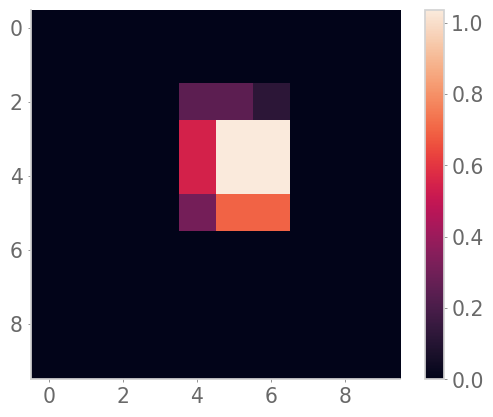

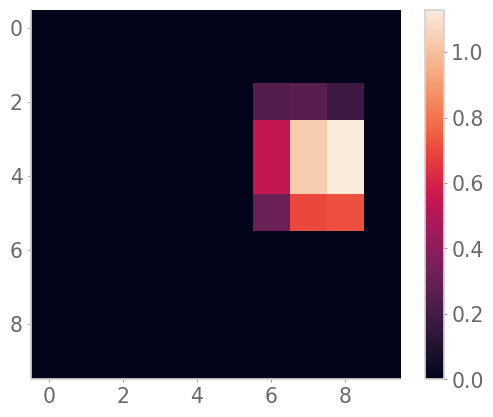

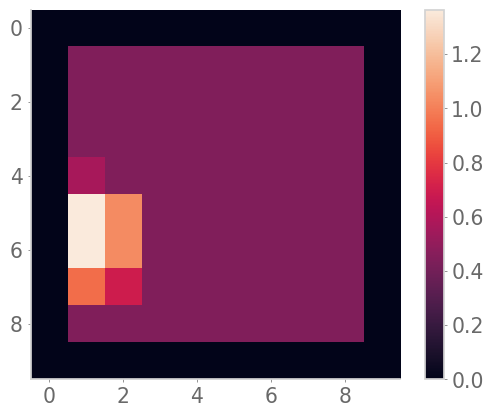

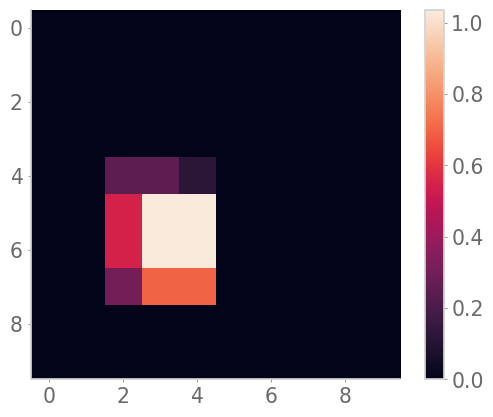

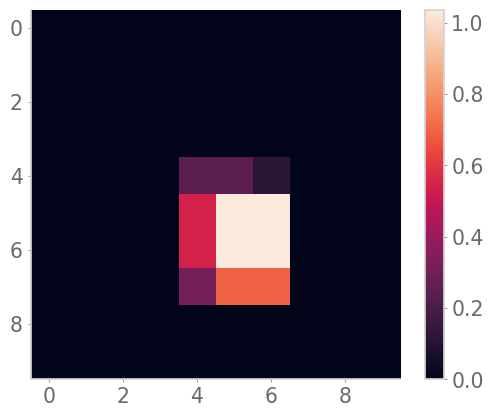

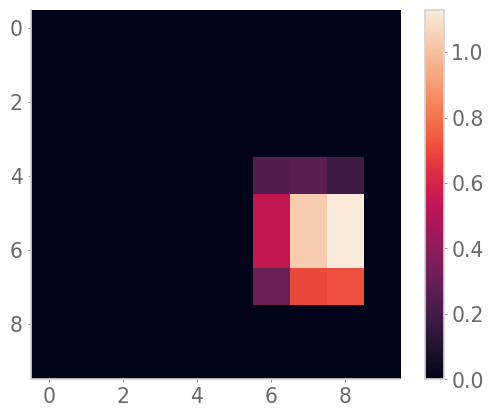

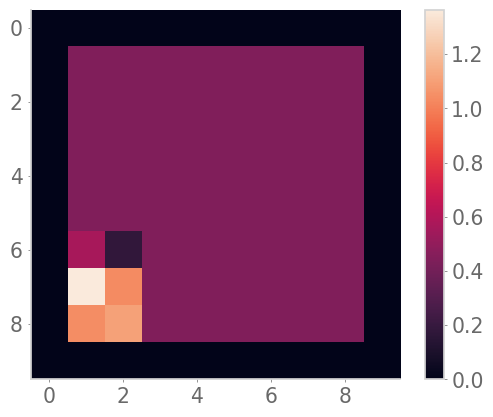

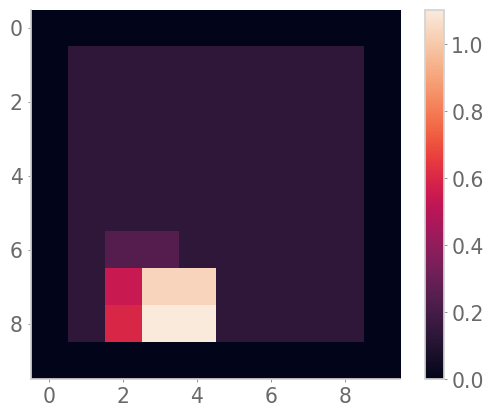

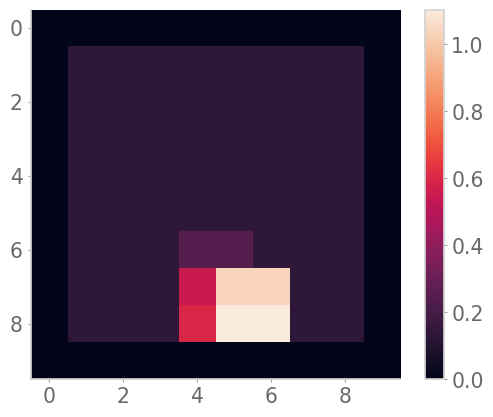

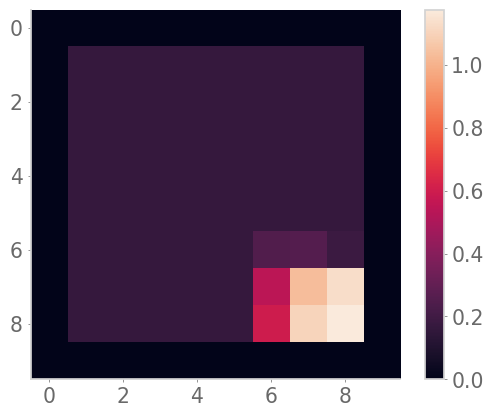

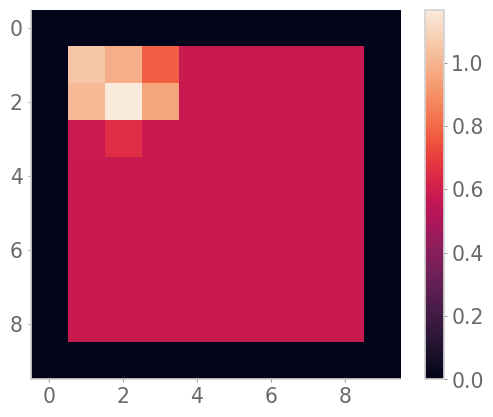

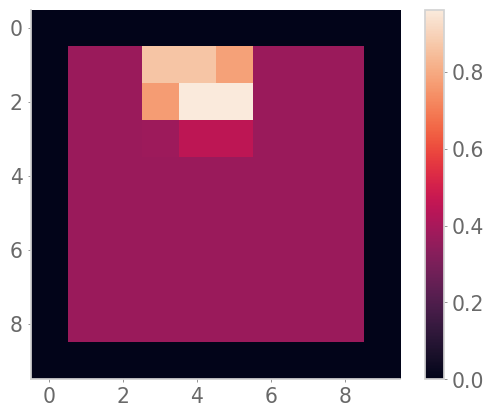

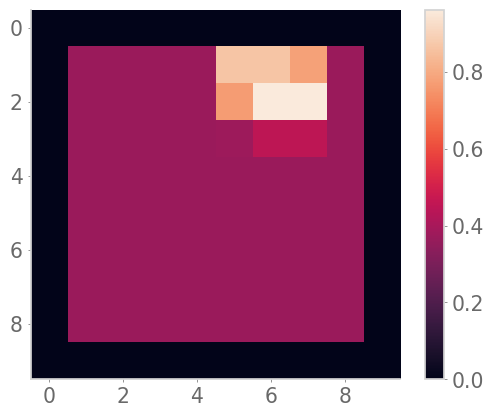

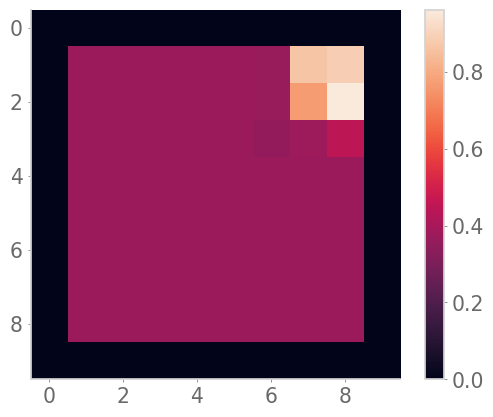

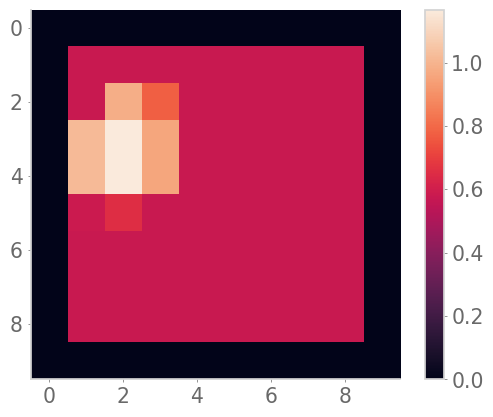

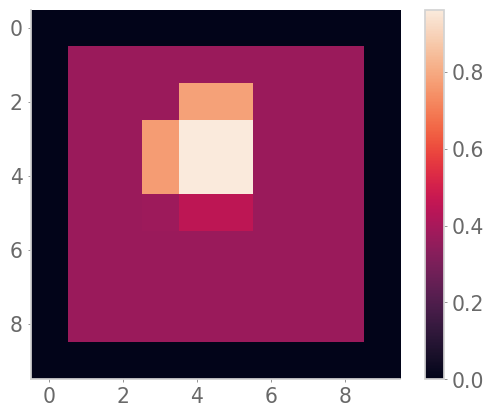

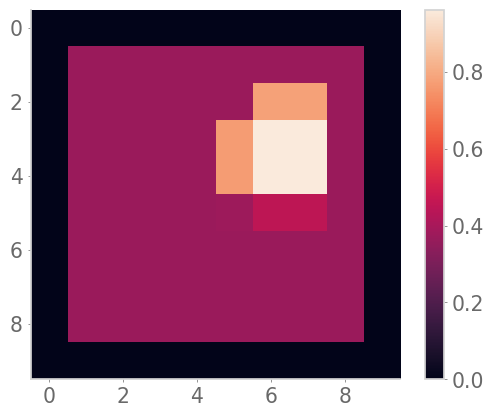

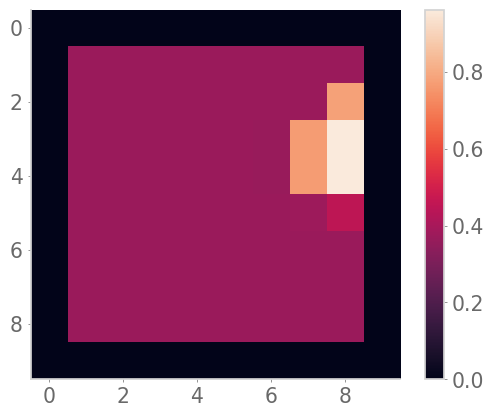

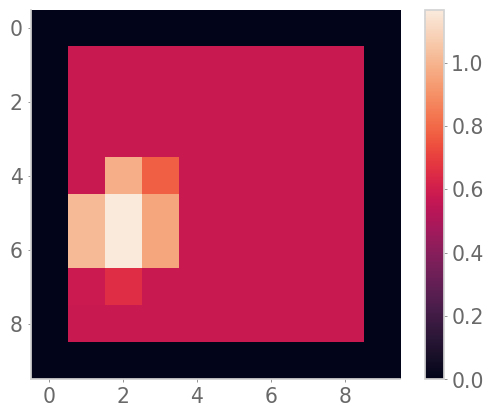

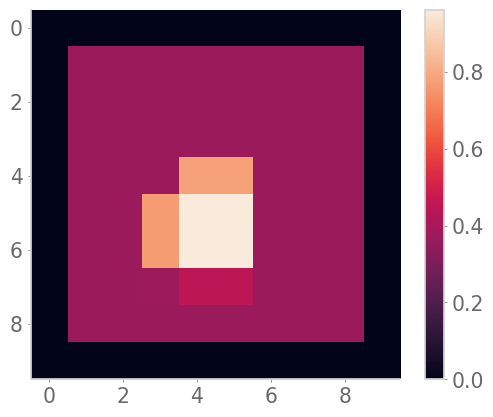

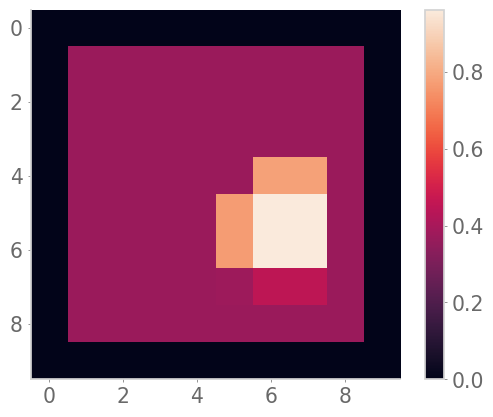

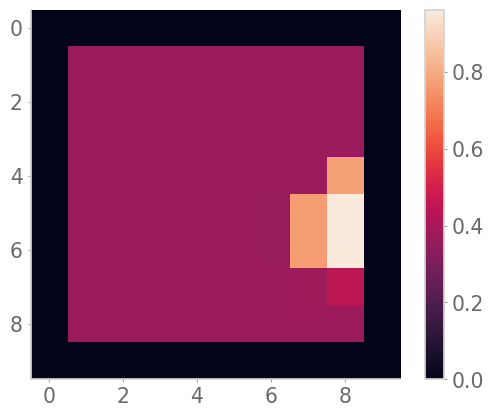

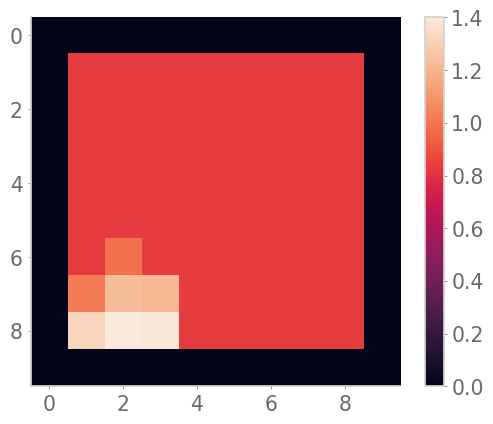

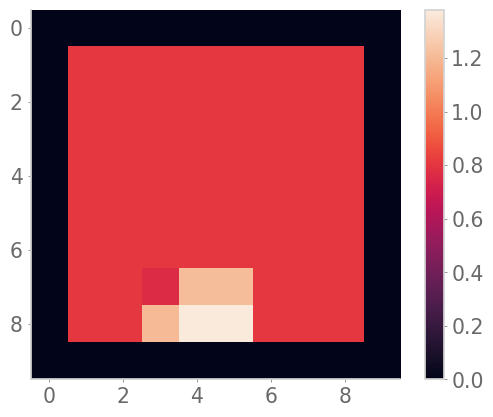

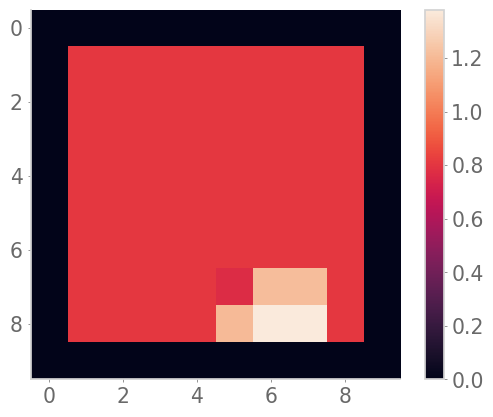

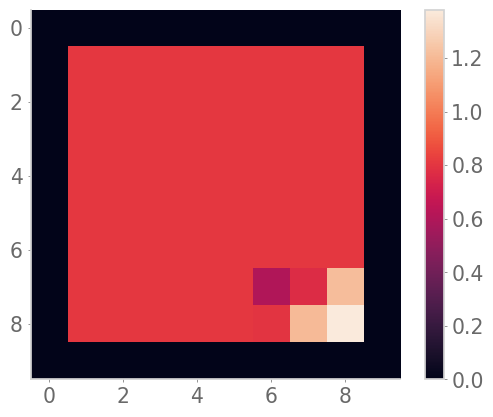

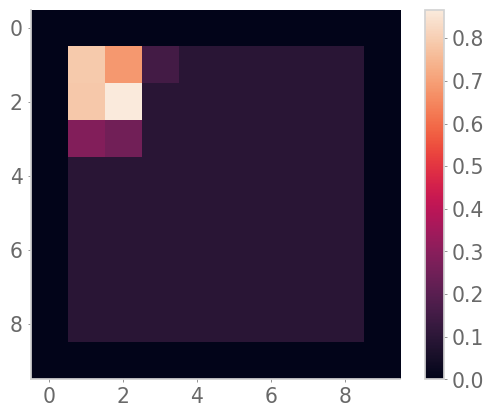

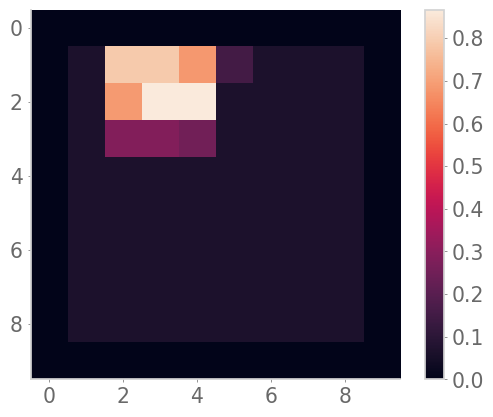

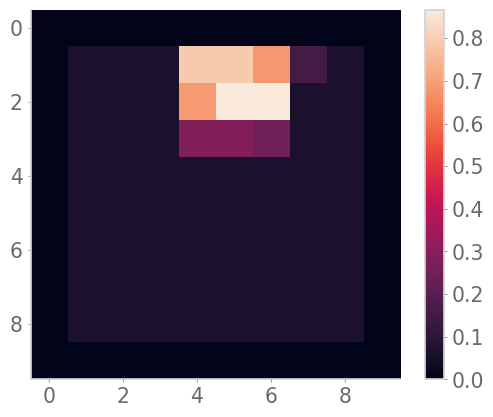

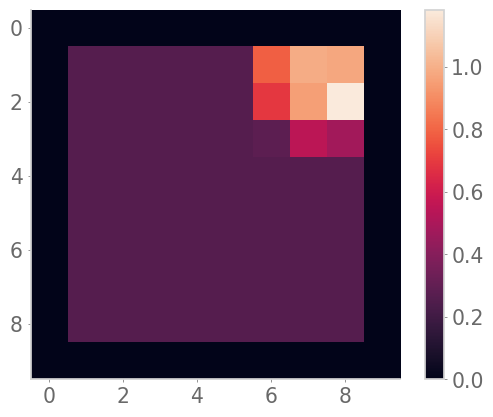

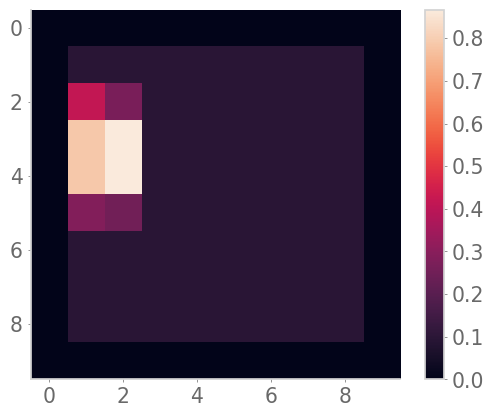

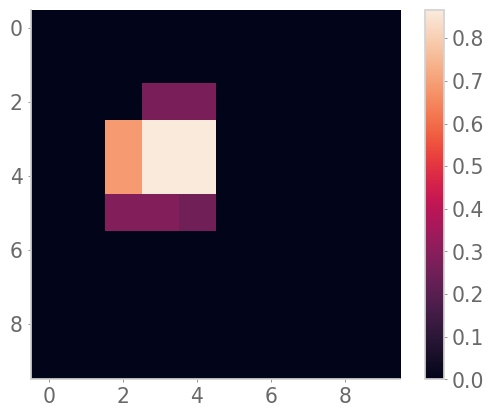

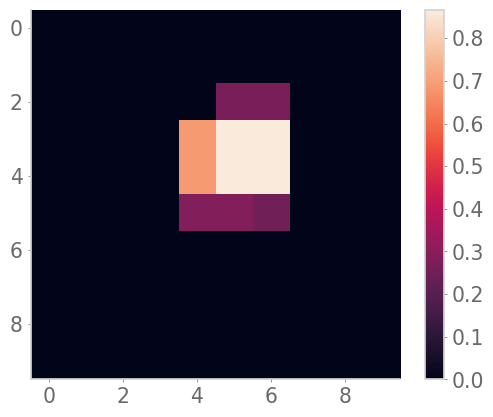

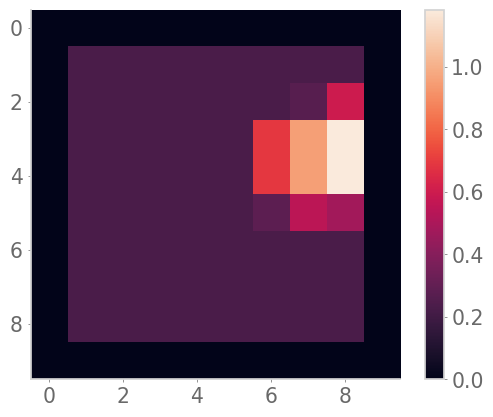

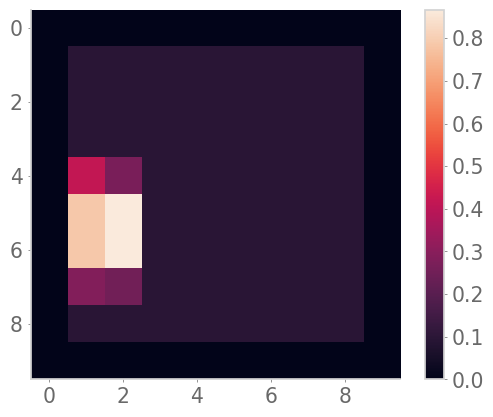

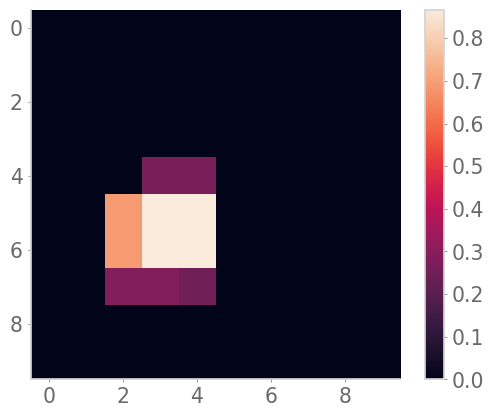

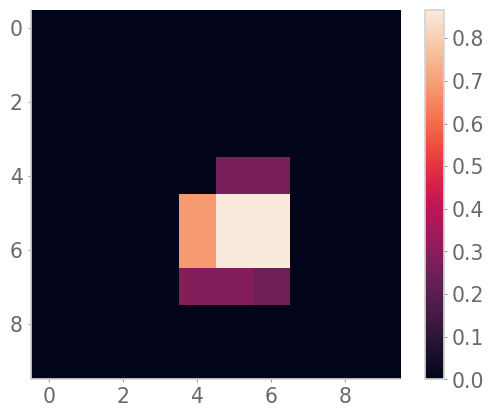

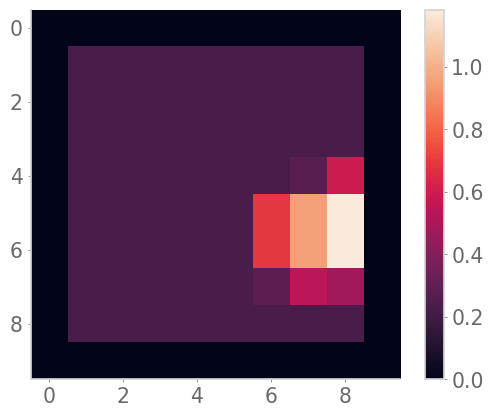

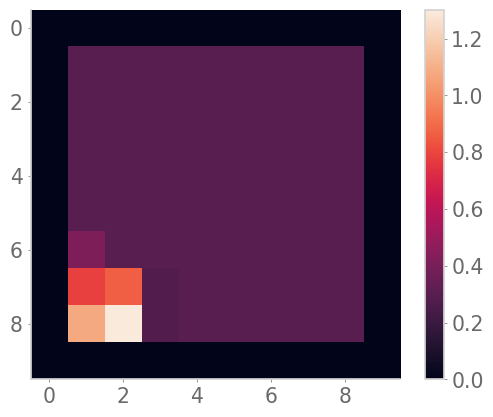


KeyboardInterrupt



In [23]:
width = np.max(_df['x']) + 2
height = np.max(_df['y']) + 2

_sample = np.array(_df.head(1)['conv_activity'].item())
n_units = np.prod(_sample.shape)
heatmap = np.zeros((n_units, width, height))

for _, row in _df.iterrows():
    x = row['x']
    y = row['y']
    latents = np.array(row['conv_activity']).flatten()
    heatmap[:,x,y] = latents

for unit in range(n_units):
    plt.figure()
    m = heatmap[unit]
    m[m<0] = 0
    plt.imshow(heatmap[unit])
    plt.colorbar()
    plt.show()